# FASE 1: Entendiendo el negocio

## Contexto:

La empresa **SotoBurguer S.A**., una compañía especializada en el análisis de datos para la industria de los videojuegos, ha sido contratada por Epic Games para ayudar a mejorar la experiencia de juego en Fortnite. El objetivo principal es utilizar los datos de rendimiento de los jugadores en modo solitario para desarrollar un modelo predictivo que pueda identificar a los jugadores con un alto potencial de rendimiento y aquellos que podrían estar en riesgo de abandonar el juego debido a un bajo desempeño.

## Problematica:

Epic Games ha observado que la retención de jugadores en Fortnite es crucial para el éxito a largo plazo del juego. Sin embargo, algunos jugadores, especialmente aquellos con un bajo desempeño, tienden a abandonar el juego después de experimentar frustración por no lograr buenos resultados. La empresa quiere crear un sistema que pueda predecir el rendimiento futuro de los jugadores basándose en su historial de juegos en modo solitario.

## Objetivo:
Desarrollar un modelo de predicción basado en las estadísticas actuales de un jugador (como el `Solo kd`, `Solo winRatio`, `Solo matches` y otras métricas), pueda predecir:
 1. **El nivel de desempeño futuro** del jugador en términos de victorias y ratio de kills/deaths (KD).
 2. **El riesgo de abandono** del jugador, definido como una disminución significativa en el número de partidas jugadas o un cambio abrupto en su rendimiento.
3. **¿Qué factores influyen en la puntuación (Solo score) de un jugador?**
4. **¿Existe una relación significativa entre el tiempo jugado (Solo minutesPlayed) y el ratio de victorias (Solo winRatio)?**
5. **Clasificar jugadores en base a su rendimiento**

## En este conjunto de datos hay 5 modos de juego (Solo, Duo, Trios. Squads y ltm) cada uno tiene:
**Puntuación:** Puntuación total.
**top1**: Victorias totales.
**kd:** Ratio de muertes.
**WinRatio:** Ratio de victorias.
**matches:** Número de partidos jugados.
**kills:** Número de eliminaciones realizadas.
**minutesPlayed:** Número total de minutos jugados.


In [ ]:
!pip install imbalanced-learn
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#cargar dataset
df_completo = pd.read_csv('/content/Fortnite_players_stats.csv')

In [ ]:
print(df_completo.columns)

Index(['Player', 'Solo score', 'Solo top1', 'Solo kd', 'Solo winRatio',
       'Solo matches', 'Solo kills', 'Solo minutesPlayed', 'Duos score',
       'Duos top1', 'Duos kd', 'Duos winRatio', 'Duos matches', 'Duos kills',
       'Duos minutesPlayed', 'Trios score', 'Trios top1', 'Trios kd',
       'Trios winRatio', 'Trios matches', 'Trios kills', 'Trios minutesPlayed',
       'Squads score', 'Squads top1', 'Squads kd', 'Squads winRatio',
       'Squads matches', 'Squads kills', 'Squads minutesPlayed', 'LTM score',
       'LTM top1', 'LTM top3', 'LTM kd', 'LTM winRatio', 'LTM matches',
       'LTM kills', 'LTM minutesPlayed'],
      dtype='object')


In [ ]:
df = df_completo[['Player', 'Solo score', 'Solo top1', 'Solo kd',
                           'Solo winRatio', 'Solo matches', 'Solo kills', 'Solo minutesPlayed']]

# FASE 2: Data Understanding


# Verificar columnas y tipos de datos

In [ ]:
columnas = df.columns
for columna in columnas:
  if df[columna].dtype == int:
    print(f"Columna {columna} ------ Tipo de variable: Cuantitativa discreta")
  elif df[columna].dtype == float:
    print(f"Columna {columna} ------ Tipo de variable: Cuantitativa continua")
  elif df[columna].dtype == object:
    print(f"Columna {columna} ------ Tipo de variable: Cualitativa nominal")
  elif df[columna].dtype == bool:
    print(f"Columna {columna} ------ Tipo de variable: Cualitativa ordinal")

Columna Player ------ Tipo de variable: Cualitativa nominal
Columna Solo score ------ Tipo de variable: Cuantitativa discreta
Columna Solo top1 ------ Tipo de variable: Cuantitativa discreta
Columna Solo kd ------ Tipo de variable: Cuantitativa continua
Columna Solo winRatio ------ Tipo de variable: Cuantitativa continua
Columna Solo matches ------ Tipo de variable: Cuantitativa discreta
Columna Solo kills ------ Tipo de variable: Cuantitativa discreta
Columna Solo minutesPlayed ------ Tipo de variable: Cuantitativa discreta


In [ ]:
# Se filtran las 10 primeras Filas
df.head(10)

,Player,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed
0,Prospеring,2476763,1828,4.37,18.0,10150,36328,81389
1,BH nixxxay,439562,1694,8.71,29.1,5817,35895,12732
2,Raпger,4519465,4582,9.60,34.0,13488,85481,122171
3,Idk_Pi,752869,121,0.84,3.3,3687,3005,32453
4,Twitch.GryphonRB,1136282,1327,6.32,30.0,4429,19591,36245
5,Twitch Kayotica,2919037,1310,3.23,9.7,13438,39131,96777
6,FaZe Replays,2389537,1454,3.84,7.8,18670,66161,76258
7,NiteGamerYT 190k,15872,6,0.47,1.4,429,200,739
8,ᴮᵒˢˢン,6772116,6480,1.39,32.6,19864,18610,283835
9,CIUPEA 144.HZ,54479,9,0.61,0.5,1938,1174,2441


In [ ]:
#Se Filtra el tipo de dato de la columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player              1435 non-null   object 
 1   Solo score          1435 non-null   int64  
 2   Solo top1           1435 non-null   int64  
 3   Solo kd             1435 non-null   float64
 4   Solo winRatio       1435 non-null   float64
 5   Solo matches        1435 non-null   int64  
 6   Solo kills          1435 non-null   int64  
 7   Solo minutesPlayed  1435 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 89.8+ KB


Verificación de datos nulos y posibles errores en DataFrame.

In [ ]:
# Verificación de datos nulos en el dataset
df.isnull().sum()

,0
Player,0
Solo score,0
Solo top1,0
Solo kd,0
Solo winRatio,0
Solo matches,0
Solo kills,0
Solo minutesPlayed,0


In [ ]:
# Verificación de valores nulos
nulos = df.isnull().sum()

In [ ]:
# Mostrar solo las columnas con valores nulos
nulos = nulos[nulos > 0]
print(nulos)

Series([], dtype: int64)


In [ ]:
# Porcentaje de valores nulos por columna
porcentaje_nulos = (nulos / len(df)) * 100
print(porcentaje_nulos)

Series([], dtype: float64)


Verificamos extensamente en la búsqueda de datos nulos pero de momento los datos a utilizar no arrojan datos nulos, pero existe la posibilidad que hayan datos negativos que los interprete como datos no nulos por lo que se verificara con el siguiente código.

In [ ]:
# Verificar si hay valores negativos en las columnas relevantes
for col in ['Solo score', 'Solo kills', 'Solo kd', 'Solo winRatio']:
    negativos = df[df[col] < 0]
    if not negativos.empty:
        print(f"Valores negativos en {col}:")
        print(negativos)

Posibles columnas con datos negativos: Seleccionamos las columnas mas relevantes para saber si existen valores negativos. La cual se encontraros múltiples jugadores que tienen valores negativos en la columna "Solo kills". Esto es problemático porque en el contexto de los videojuegos, es ilógico tener un número negativo de "kills" (muertes o eliminaciones de jugadores). Un "kill" siempre debe ser un número no negativo.

En la columna "Solo minutesPlayed", algunos jugadores tienen valores negativos. Al igual que con "Solo kills", no debería haber tiempos de juego negativos, ya que el tiempo es siempre positivo.

Algunos valores negativos aparecen en "Solo kd" (K/D ratio), lo que también es inusual. El K/D ratio debe estar en un rango no negativo, a menos que haya una interpretación específica en los datos.

In [ ]:
df.loc[:, 'Solo kills'] = df['Solo kills'].apply(lambda x: x if x >= 0 else np.nan)
df.loc[:, 'Solo minutesPlayed'] = df['Solo minutesPlayed'].apply(lambda x: x if x >= 0 else np.nan)

Remplazo de los valores: Ahora reemplazamos los valores negativos con NaN (valores nulos), para luego decidir si se deben rellenar, ignorar o eliminar.
Tambien reemplazamos con cero si tiene sentido en el contexto (especialmente en kills o tiempo jugado).

In [ ]:
# Verificar si hay datos negativos
(df[['Solo score', 'Solo top1', 'Solo kd', 'Solo winRatio', 'Solo matches', 'Solo kills', 'Solo minutesPlayed']] < 0).sum()

,0
Solo score,0
Solo top1,0
Solo kd,0
Solo winRatio,0
Solo matches,0
Solo kills,0
Solo minutesPlayed,0


Ahora al no existir datos negativos y nulos, estamos listo para comenzar las medidas de posición.

### Medidas de posición

In [ ]:
#Resumen de Medidas de posición, para datos numéricos
print(df.describe())

         Solo score    Solo top1      Solo kd  Solo winRatio  Solo matches  \
count  1.435000e+03  1435.000000  1435.000000    1435.000000   1435.000000   
mean   1.088202e+06   328.909408     1.816300       4.853937   6911.060627   
std    8.872639e+05   529.192568     1.156026       5.330249   5408.219523   
min    4.453000e+03     0.000000     0.080000       0.000000     30.000000   
25%    4.355170e+05    65.500000     1.050000       1.600000   2875.000000   
50%    9.070010e+05   162.000000     1.480000       2.900000   5728.000000   
75%    1.506555e+06   366.000000     2.200000       6.100000   9585.000000   
max    6.772116e+06  6480.000000     9.600000      44.100000  36487.000000   

         Solo kills  Solo minutesPlayed  
count   1435.000000         1435.000000  
mean   11781.843206        43517.135889  
std    11417.340071        36314.877771  
min       28.000000          210.000000  
25%     3861.000000        16922.000000  
50%     8452.000000        35762.000000  
75%

In [ ]:
# Excluir columnas no numéricas
df_numeric = df.select_dtypes(include=[float, int])

# Calcular la matriz de correlación solo con las columnas numéricas
correlation_matrix = df_numeric.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)


                    Solo score  Solo top1   Solo kd  Solo winRatio  \
Solo score            1.000000   0.598385  0.203172       0.245719   
Solo top1             0.598385   1.000000  0.659677       0.768525   
Solo kd               0.203172   0.659677  1.000000       0.854501   
Solo winRatio         0.245719   0.768525  0.854501       1.000000   
Solo matches          0.860244   0.361533  0.036813      -0.022918   
Solo kills            0.715041   0.748277  0.613477       0.448650   
Solo minutesPlayed    0.979049   0.484908  0.067514       0.133830   

                    Solo matches  Solo kills  Solo minutesPlayed  
Solo score              0.860244    0.715041            0.979049  
Solo top1               0.361533    0.748277            0.484908  
Solo kd                 0.036813    0.613477            0.067514  
Solo winRatio          -0.022918    0.448650            0.133830  
Solo matches            1.000000    0.705988            0.859965  
Solo kills              0.705988    1

##  Matriz de correlación

Las variables Solo score, Solo matches y Solo minutesPlayed están fuertemente correlacionadas, podemos decir que el tiempo jugado y el número de partidas tienen un gran impacto en la puntuación total.

Solo winRatio está fuertemente correlacionado con la capacidad del jugador de estar en el Solo top1 y con su habilidad de combate (Solo kd).

No hay correlación significativa entre algunas variables, como Solo matches y Solo kd, lo que puede sugerir que jugar más partidas no mejora la relación de asesinatos/muertes de un jugador.

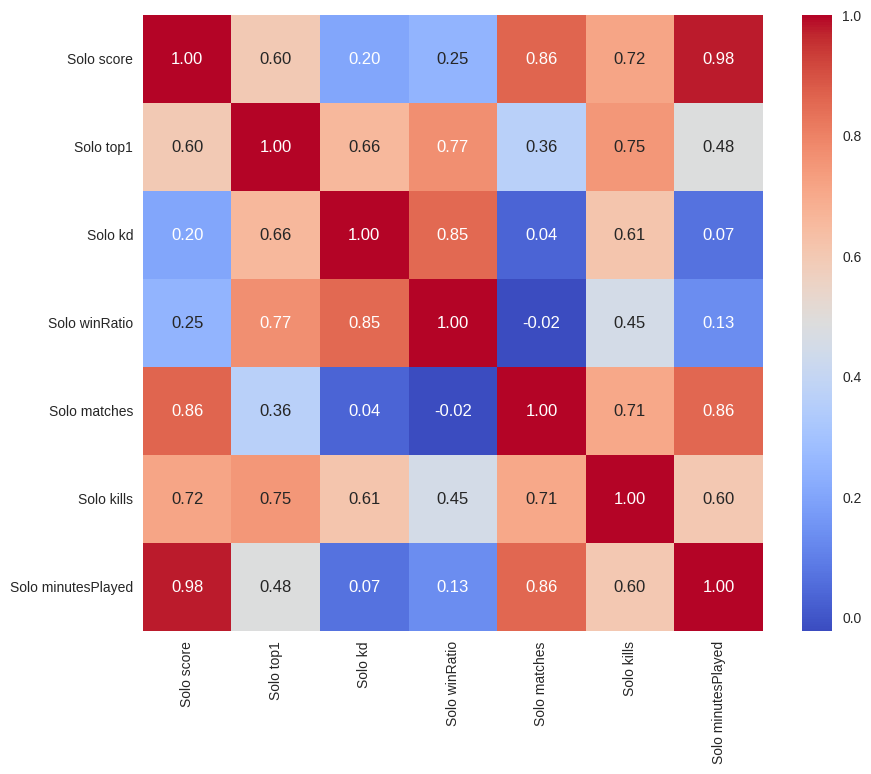

In [ ]:
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

### Scatter Plots (Diagramas de Dispersión):

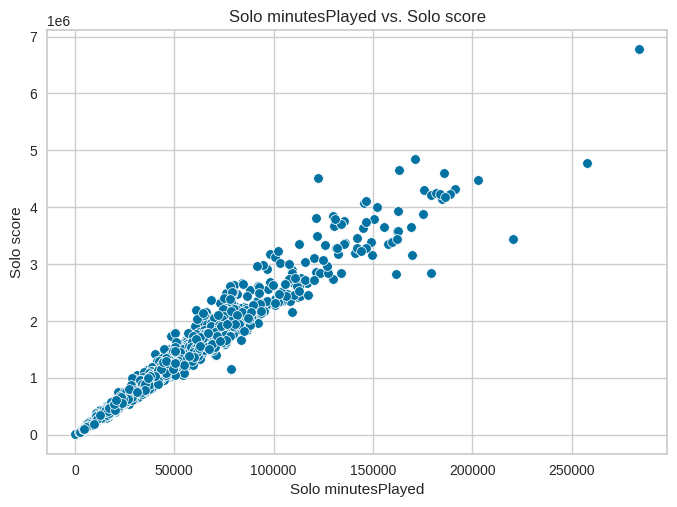

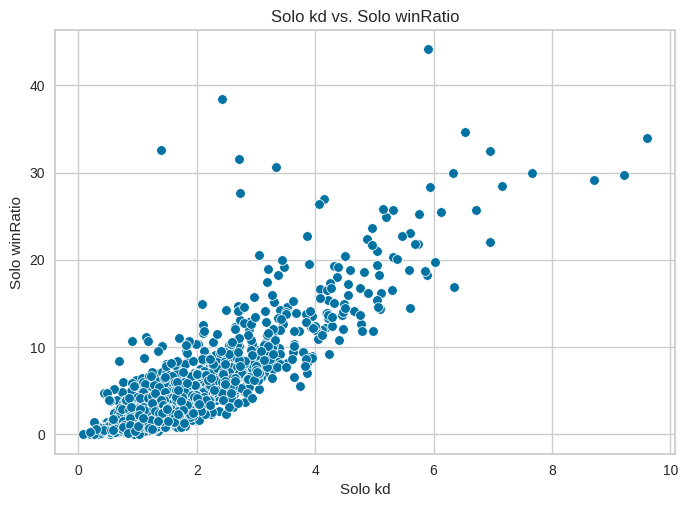

In [ ]:
sb.scatterplot(x='Solo minutesPlayed', y='Solo score', data=df)
plt.title('Solo minutesPlayed vs. Solo score')
plt.show()

sb.scatterplot(x='Solo kd', y='Solo winRatio', data=df)
plt.title('Solo kd vs. Solo winRatio')
plt.show()



Solo minutesPlayed vs. Solo score: Dado que existe una fuerte correlación entre el tiempo jugado y el puntaje, un scatter plot puede mostrar cómo el puntaje de los jugadores aumenta con el tiempo jugado. Esto es una clara tendencia positiva, lo que sugiere que a medida que los jugadores juegan más minutos, su puntuación total aumenta. Esto es logico, ya que mientras mas juegas generalmente proporcionas mas oportunidades de obtener mas puntaje.
Solo kd vs. Solo winRatio: Con una correlación alta entre el ratio KD y el winRatio, un scatter plot puede ayudar a visualizar cómo se relacionan estas dos métricas. Lo que muestra que a medida que aumenta el KD de un jugador, tambien tiende aumentar su ratio de victorias.

Los puntos en la parte superior derecha del gráfico (alto KD y alto winRatio) representan jugadores con alto potencial. Estos jugadores tienen un KD superior a 4 y un winRatio por encima del 20%.
Epic Games podría enfocarse en estos jugadores para programas de jugadores destacados, torneos o como modelos a seguir para la comunidad.

 Si bien jugar más aumenta la puntuación, la cantidad de victorias y KD podrían depender más de la habilidad que solo del tiempo jugado. Es decir, un jugador que ha jugado muchas horas no necesariamente tendrá un buen KD o un gran número de victorias si su rendimiento en el juego no es eficiente.

# Box Plot

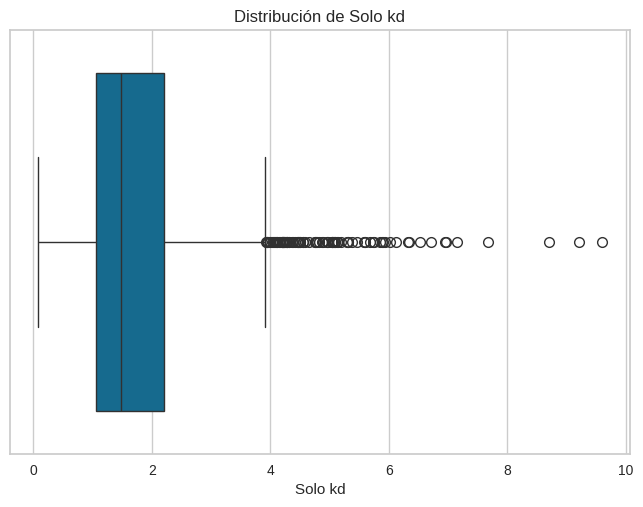

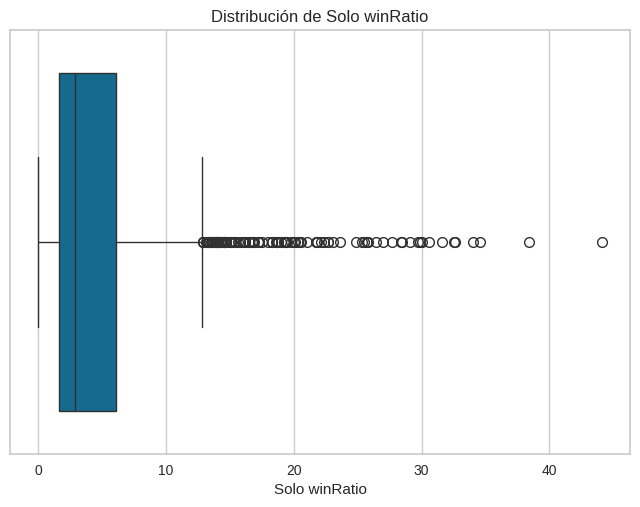

In [ ]:
sb.boxplot(x='Solo kd', data=df)
plt.title('Distribución de Solo kd')
plt.show()

sb.boxplot(x='Solo winRatio', data=df)
plt.title('Distribución de Solo winRatio')
plt.show()


Solo KD: La línea dentro de la caja representa la mediana del Solo kd, que parece estar alrededor de 1. Esto significa que el 50% de los jugadores tienen un ratio de eliminación-muerte menor o igual a 1.

Se observa un grupo considerable de outliers a la derecha del gráfico, es decir, jugadores que tienen un Solo kd significativamente mayor que el promedio. Algunos jugadores tienen valores de Solo kd que llegan hasta 10, pero son casos poco comunes.

Solo winRatio: La línea en la caja sugiere que la mediana del win ratio está entre 5% y 10%, lo que indica que el 50% de los jugadores ganan menos del 10% de las partidas que juegan.

Nuevamente, se observan muchos outliers hacia la derecha, con algunos jugadores logrando ratios de victoria que superan el 40%. Estos jugadores son excepcionales en comparación con la mayoría.

# Histogramas

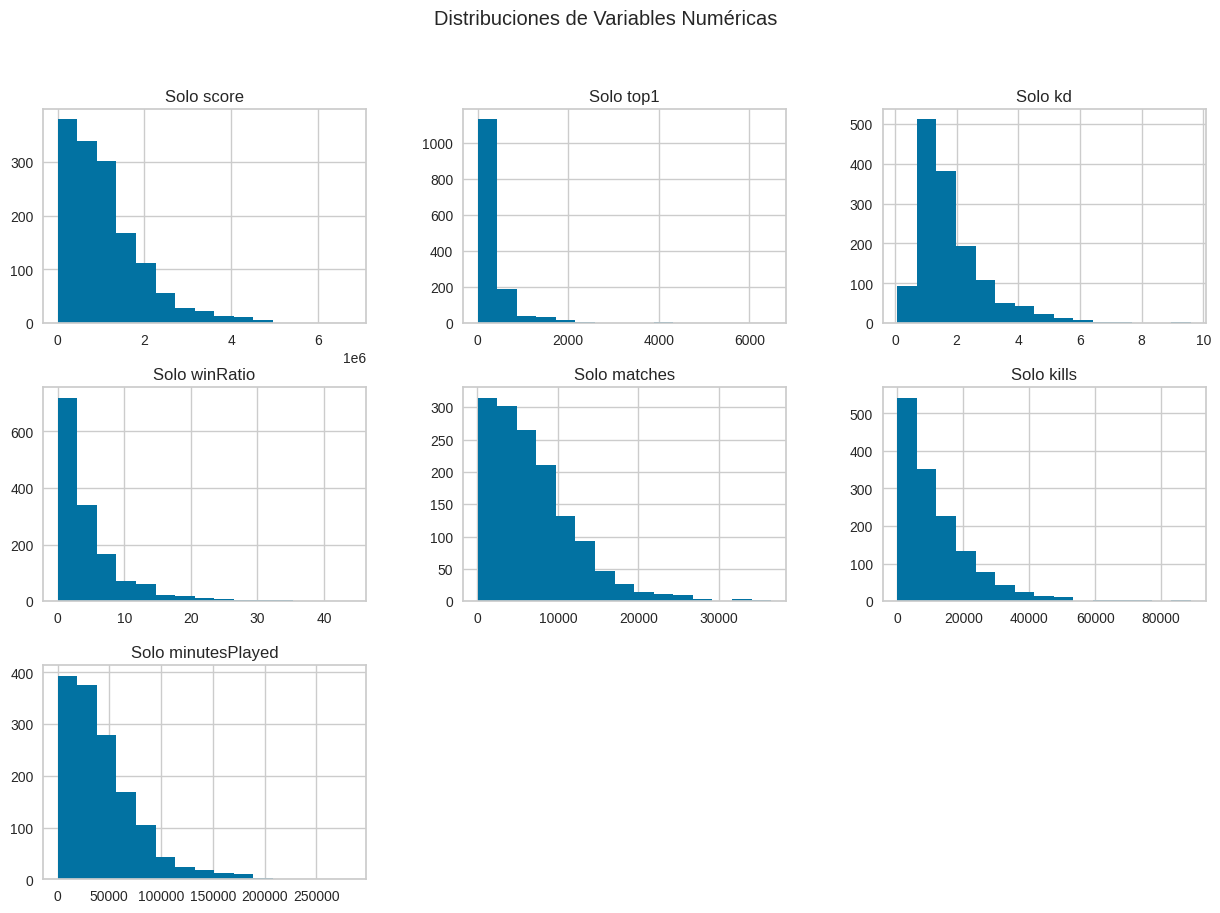

In [ ]:
df_numeric.hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Distribuciones de Variables Numéricas')
plt.show()


Solo score:
-Hay una concentración de valores bajos y una larga cola hacia la derecha, lo que nos indicaría que la mayoría de los jugadores tienen una puntuación baja, mientras que muy pocos tienen puntuaciones extremadamente altas.
Solo top1:
-La mayoría de los jugadores tienen pocas o ninguna victoria, mientras que solo unos pocos tienen un gran número de victorias.                            
Solo kd:
-La mayoría de los jugadores tienen un kd bajo, con pocos jugadores teniendo un kd muy alto.
-Tiene una distribución sesgada a la derecha, indicando que la mayoría de los jugadores no tienen una relación de asesinatos/muertes alta.
Solo winRatio:
-La mayoría de los jugadores tienen una proporción de victorias baja (menor a 10%), con solo unos pocos jugadores alcanzando porcentajes mayores.
Solo matches:
-Se tiene una distribución sesgada a la derecha, nos indica que es común tener pocos jugadores que juegan muchas partidas y que la mayoría han jugado un número relativamente bajo de partidas, mientras que unos pocos han jugado muchas más.
Solo kills:
-La mayoría de los jugadores tienen un número bajo de asesinatos, y pocos jugadores tienen un número muy alto.
-Esta variable también muestra una distribución sesgada a la derecha.
Solo minutesPlayed:
-La mayoría de los jugadores tienen menos tiempo de juego, y hay algunos jugadores con una cantidad de tiempo de juego muy alta.

## Identificar los jugadores con el mejor rendimiento en Modo Solitario

In [ ]:
# Ordenar por rendimiento en el modo Solo
mejores_jugadores_solo = df.sort_values(by=['Solo score', 'Solo winRatio', 'Solo kd'], ascending=False)

# Mostrar los jugadores con el mejor rendimiento en cada modo
print("Mejores jugadores en Solo:\n", mejores_jugadores_solo[['Player', 'Solo score', 'Solo winRatio', 'Solo kd']].head(10))


Mejores jugadores en Solo:
                Player  Solo score  Solo winRatio  Solo kd
8               ᴮᵒˢˢン     6772116           32.6     1.39
11     DarkAssaSSin._     4840719           30.6     3.34
110         TEBELKING     4784847            5.5     0.95
14            MachiTv     4659548           19.5     3.90
53          Ninjadad5     4595164            0.8     1.01
2              Raпger     4519465           34.0     9.60
144          RailCart     4479084            1.8     0.73
37               Ci2i     4323464            1.6     0.84
17          prOMancos     4300077            1.8     1.27
186  facu giorgetta29     4253032            7.0     1.36


## Cálculo de los jugadores de menor rendimiento, riesgo de abandono en el Modo Solitario y disminución significativa en el número de partidas jugadas

In [ ]:
# Filtrar jugadores con Solo kd y Solo winRatio bajos (por debajo de la mediana)
jugadorBajoRendimiento = df[(df['Solo kd'] < df['Solo kd'].median()) &
                             (df['Solo winRatio'] < df['Solo winRatio'].median())]

# Guardar el dataset filtrado como archivo CSV
jugadorBajoRendimiento.to_csv('jugadoresBajoRendimiento.csv', index=False)

In [ ]:
# Filtrar jugadores que han jugado pocas partidas en comparación con el promedio
jugadoresPocasPartidas = df[df['Solo matches'] < df['Solo matches'].quantile(0.25)]
# Guardar el dataset
jugadoresPocasPartidas.to_csv('jugadoresPocasPartidas.csv', index=False)

In [ ]:
# Filtrar jugadores con bajo rendimiento y baja actividad
jugadorBajoRendimientoyBajaAct = df[(df['Solo kd'] < df['Solo kd'].median()) &
                     (df['Solo winRatio'] < df['Solo winRatio'].median()) &
                     (df['Solo matches'] < df['Solo matches'].quantile(0.25))]

# Guardar el dataset
jugadorBajoRendimientoyBajaAct.to_csv('jugadorBajoRendimientoyBajaAct.csv', index=False)

In [ ]:
jugadorBajoRendimiento.head(10)

,Player,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed
7,NiteGamerYT 190k,15872,6,0.47,1.4,429,200,739
9,CIUPEA 144.HZ,54479,9,0.61,0.5,1938,1174,2441
13,Τriρs,478280,25,0.70,1.0,2581,1785,21679
17,prOMancos,4300077,576,1.27,1.8,32898,40942,175643
18,Scribell,212388,34,1.03,2.3,1491,1505,8945
19,Qx_9u انستا,228620,79,1.03,2.4,3269,3281,8903
23,Deathfury420,1257973,51,0.95,0.6,8568,8101,55671
24,KING nax nax,1407541,70,0.80,0.7,10460,8356,63105
28,UçaN_HamSi,67758,25,0.68,1.1,2182,1471,3199
29,Kid_Fighter,2428145,331,1.06,2.8,11967,12348,103551


In [ ]:
print(jugadorBajoRendimiento.describe())

         Solo score   Solo top1     Solo kd  Solo winRatio  Solo matches  \
count  5.730000e+02  573.000000  573.000000     573.000000    573.000000   
mean   9.795136e+05   99.668412    1.001850       1.451134   7292.431065   
std    9.044167e+05   92.986643    0.277303       0.693415   6444.610264   
min    4.453000e+03    0.000000    0.080000       0.000000     30.000000   
25%    2.862850e+05   28.000000    0.830000       0.900000   2256.000000   
50%    7.330330e+05   74.000000    1.020000       1.400000   5752.000000   
75%    1.359115e+06  143.000000    1.230000       2.000000  10247.000000   
max    4.595164e+06  591.000000    1.470000       2.800000  36487.000000   

         Solo kills  Solo minutesPlayed  
count    573.000000          573.000000  
mean    7384.303665        42627.394415  
std     6923.464940        40263.510377  
min       28.000000          210.000000  
25%     2147.000000        12418.000000  
50%     5460.000000        31656.000000  
75%    10606.000000  

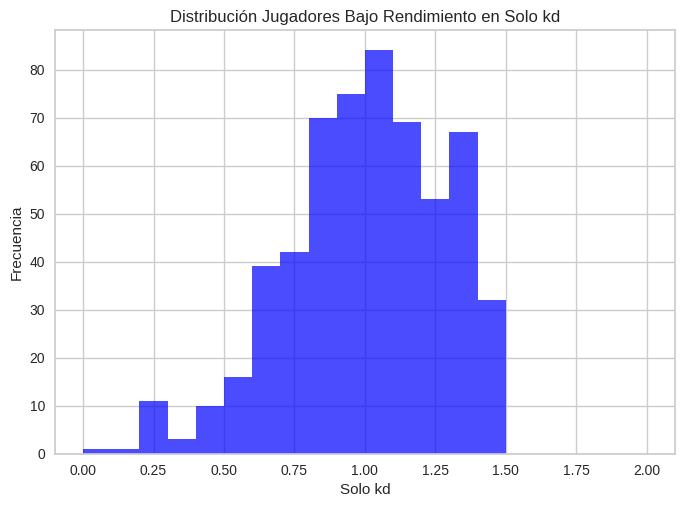

In [ ]:
# Histograma de Solo kd para jugadores de bajo rendimiento
plt.hist(jugadorBajoRendimiento['Solo kd'], bins=20, color='blue', alpha=0.7, range=(0,2))
plt.title('Distribución Jugadores Bajo Rendimiento en Solo kd')
plt.xlabel('Solo kd')
plt.ylabel('Frecuencia')
plt.show()

La mayor concentración de jugadores de menor rendimiento está alrededor de los valores de 1.0 y 1.25 en Solo kd. Esto significa que la mayoría de los jugadores considerados de bajo rendimiento tienen una proporción de 1 o un poco más de 1 muerte por cada vez que mueren.

Casi no hay jugadores con un Solo kd superior a 1.5, lo que refuerza la idea de que estos jugadores están en la categoría de bajo rendimiento y con altas posibilidades de abandono de juego.

## ¿Qué factores influyen en la puntuación (Solo score) de un jugador?

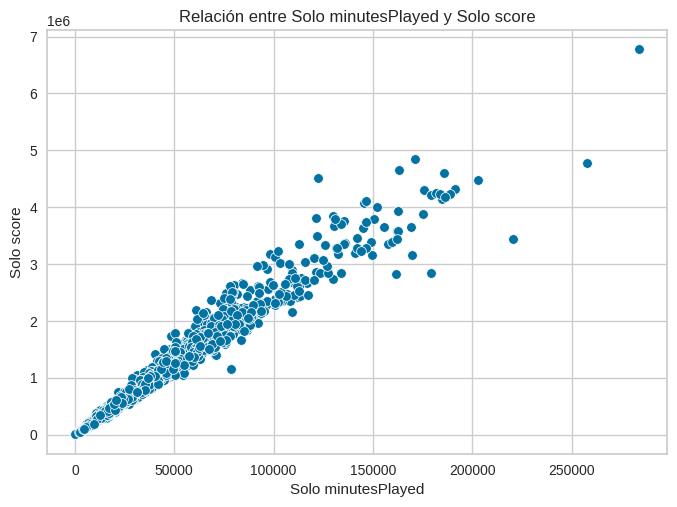

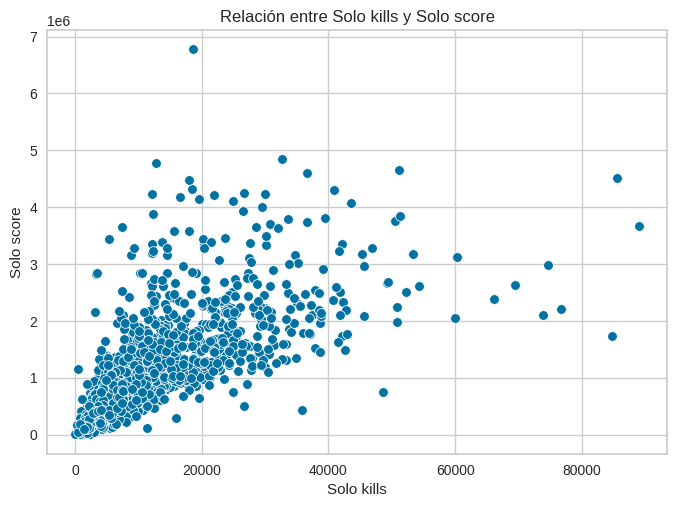

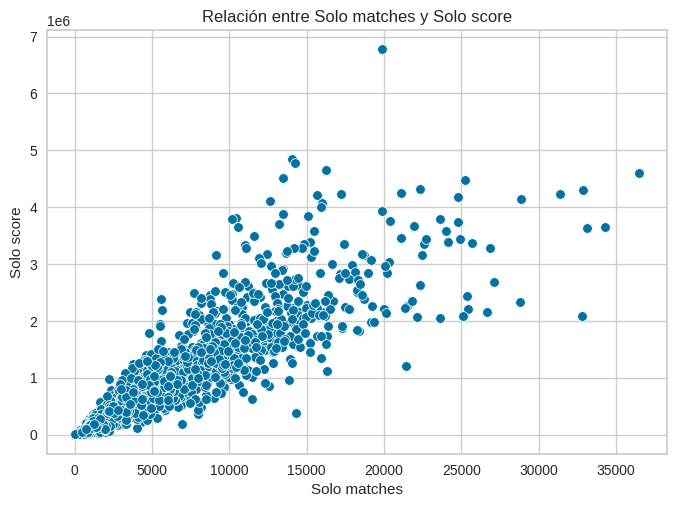

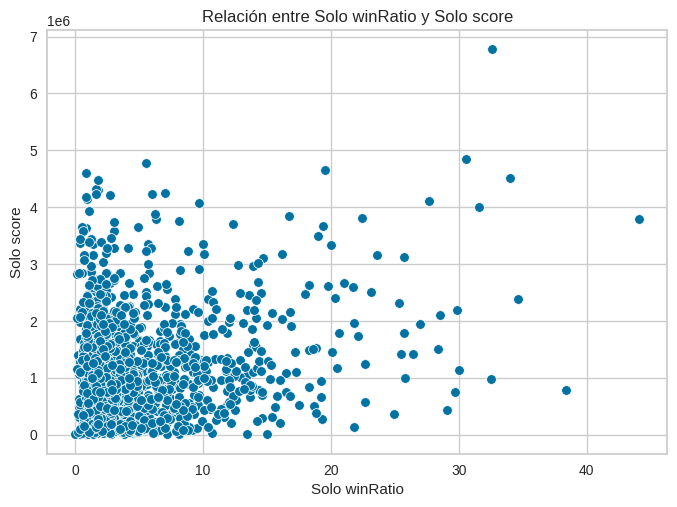

In [ ]:
variables = ['Solo minutesPlayed', 'Solo kills', 'Solo matches', 'Solo winRatio']

# Gráficos de dispersión
for var in variables:
    plt.figure()
    sb.scatterplot(x=df[var], y=df['Solo score'])
    plt.title(f'Relación entre {var} y Solo score')
    plt.xlabel(var)
    plt.ylabel('Solo score')
    plt.show()

Existe una fuerte correlación entre el tiempo jugado (Solo minutesPlayed), el número de partidas (Solo matches), y el puntaje (Solo score). Esto indica que el puntaje es influenciado significativamente por la cantidad de tiempo y partidas jugadas. Aunque Solo kills también muestra una correlación positiva con el Solo Score, la dispersión muestra que la presencia de otros factores influyentes. Solo winRatio muestra la menor correlación, lo que indica que ganar una mayor proporción de partidas no siempre asegura un puntaje más alto.

## Existe una relación significativa entre el tiempo jugado (Solo minutesPlayed) y el ratio de victorias (Solo winRatio)?

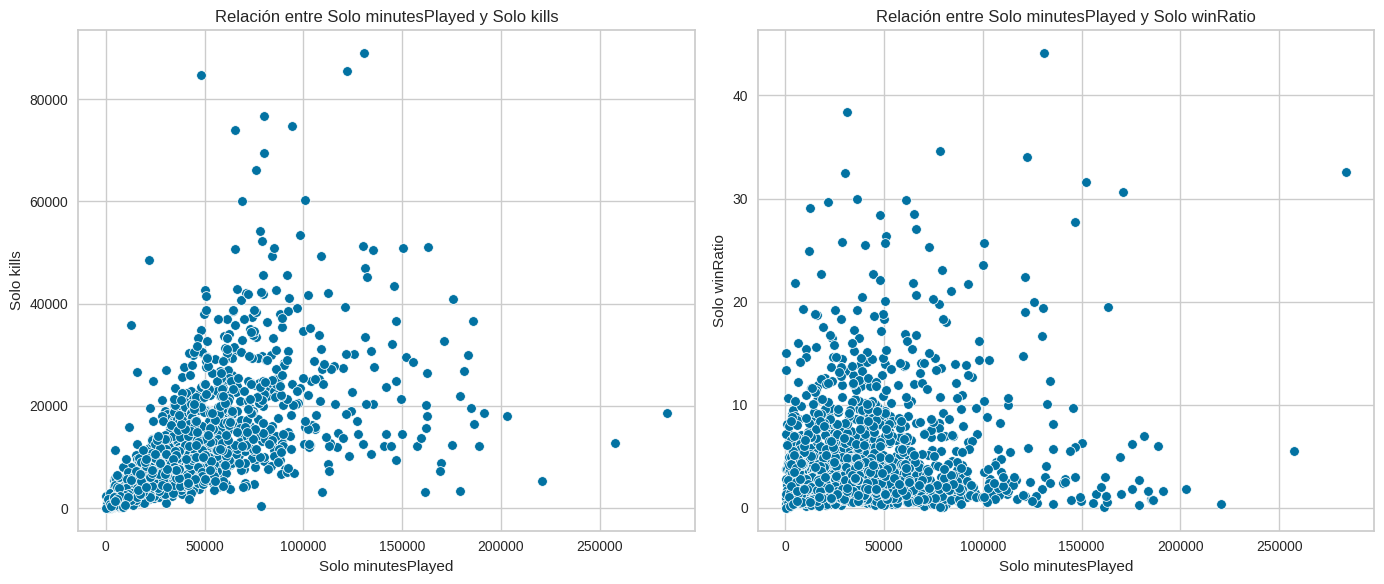

In [ ]:
# Crear gráficos de dispersión
plt.figure(figsize=(14, 6))

# Scatter plot entre Solo minutesPlayed y Solo kills
plt.subplot(1, 2, 1)
sb.scatterplot(x=df['Solo minutesPlayed'], y=df['Solo kills'])
plt.title('Relación entre Solo minutesPlayed y Solo kills')
plt.xlabel('Solo minutesPlayed')
plt.ylabel('Solo kills')

# Scatter plot entre Solo minutesPlayed y Solo winRatio
plt.subplot(1, 2, 2)
sb.scatterplot(x=df['Solo minutesPlayed'], y=df['Solo winRatio'])
plt.title('Relación entre Solo minutesPlayed y Solo winRatio')
plt.xlabel('Solo minutesPlayed')
plt.ylabel('Solo winRatio')

plt.tight_layout()
plt.show()

En el primer gráfico se observa que hay una tendencia positiva entre SoloMinutesPlayed y Solo Kills, según la matriz de correlación es de un 0.60, lo que indica que a medida que el tiempo de juego aumenta, también aumenta el número de eliminaciones.

Podemos decir que los jugadores que juegan más tiempo tienden a conseguir más eliminaciones. Pero, la separación de puntos nos demuestra que son muy dispersas, lo que nos señala que no todos los jugadores con mucho tiempo de juego tienen un alto número de eliminaciones.

En el gráfico de Relación entre SoloMinutesPlayed y SoloWinRatio no hay una relación clara entre estas dos variables, ya que los puntos están distribuidos de manera más dispersa y no existe una tendencia clara.

# Fase 3 Data Preparation

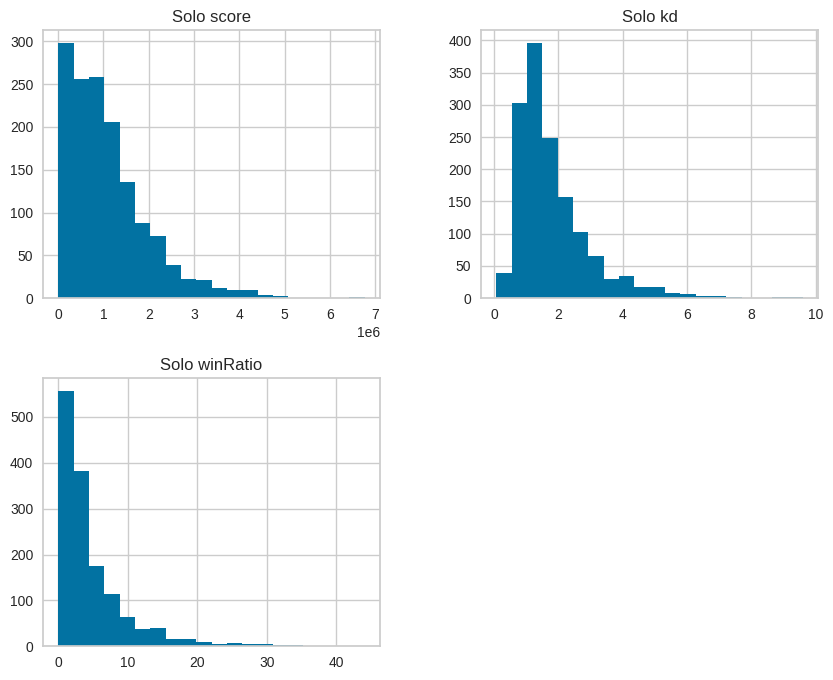

In [ ]:
# Histograma para visualizar la distribución
df[['Solo score', 'Solo kd', 'Solo winRatio']].hist(bins=20, figsize=(10, 8))
plt.show()

Solo score (Puntuación en Solitario):  Este tipo de distribución sugiere que la mayor parte de los jugadores están concentrados en un rango bajo de puntuación, con un número reducido de jugadores que logran puntuaciones muy altas. Esto puede indicar una disparidad en el rendimiento, donde solo unos pocos jugadores son significativamente más exitosos que el promedio.

 Solo kd (Relación K/D en Solitario): Esto indica que muchos jugadores tienden a mantener un rendimiento equilibrado (un número similar de bajas y muertes), mientras que solo algunos jugadores tienen un rendimiento mucho más alto (con un kd por encima de 2 o 3). Los valores extremos pueden ser jugadores con mucha habilidad o que se enfrentan a oponentes de menor nivel.

Solo winRatio (Porcentaje de Victorias en Solitario): La mayoría de los jugadores probablemente tengan dificultades para ganar en partidas en solitario. Solo un pequeño porcentaje logra un winRatio alto, lo cual es esperable, ya que las victorias son un resultado más exclusivo en un entorno competitivo como Fortnite.

Todas las variables muestran una distribución sesgada a la derecha, lo que sugiere que la mayoría de los jugadores tienen un rendimiento moderado, mientras que solo unos pocos logran resultados significativamente mejores.

Para mejorar el rendimiento del modelo vamos a normalizar los datos  así obtener un mejor nivel predictivo de los datos.

Primero seleccionamos las columnas que vamos a normalizar y utilizamos MinMaxScaler para escalar a valores entre 0 y 1.

In [ ]:
columnasNormalizar = ['Solo score', 'Solo top1', 'Solo kd', 'Solo winRatio', 'Solo matches', 'Solo kills', 'Solo minutesPlayed']

Columnas antes de la normalización

In [ ]:
df.head(10)

,Player,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed
0,Prospеring,2476763,1828,4.37,18.0,10150,36328,81389
1,BH nixxxay,439562,1694,8.71,29.1,5817,35895,12732
2,Raпger,4519465,4582,9.60,34.0,13488,85481,122171
3,Idk_Pi,752869,121,0.84,3.3,3687,3005,32453
4,Twitch.GryphonRB,1136282,1327,6.32,30.0,4429,19591,36245
5,Twitch Kayotica,2919037,1310,3.23,9.7,13438,39131,96777
6,FaZe Replays,2389537,1454,3.84,7.8,18670,66161,76258
7,NiteGamerYT 190k,15872,6,0.47,1.4,429,200,739
8,ᴮᵒˢˢン,6772116,6480,1.39,32.6,19864,18610,283835
9,CIUPEA 144.HZ,54479,9,0.61,0.5,1938,1174,2441


Columnas después de la normalización

In [ ]:
# Aplicar Min-Max Scaler
scaler = MinMaxScaler()
dfNormalizado = df.copy()  # Crear una copia del DataFrame
# Reemplazar las columnas normalizadas directamente en el DataFrame original
df[columnasNormalizar] = scaler.fit_transform(df[columnasNormalizar])
# Mostrar los primeros 10 registros para verificar
df.head(10)

<ipython-input-349-ab07ce6c9f57>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columnasNormalizar] = scaler.fit_transform(df[columnasNormalizar])


,Player,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed
0,Prospеring,0.365312,0.282099,0.450630,0.408163,0.277587,0.407888,0.286219
1,BH nixxxay,0.064292,0.261420,0.906513,0.659864,0.158735,0.403023,0.044150
2,Raпger,0.667145,0.707099,1.000000,0.770975,0.369147,0.960200,0.430008
3,Idk_Pi,0.110587,0.018673,0.079832,0.074830,0.100310,0.033451,0.113682
4,Twitch.GryphonRB,0.167241,0.204784,0.655462,0.680272,0.120663,0.219821,0.127052
5,Twitch Kayotica,0.430663,0.202160,0.330882,0.219955,0.367776,0.439384,0.340474
6,FaZe Replays,0.352424,0.224383,0.394958,0.176871,0.511287,0.743109,0.268129
7,NiteGamerYT 190k,0.001687,0.000926,0.040966,0.031746,0.010944,0.001933,0.001865
8,ᴮᵒˢˢン,1.000000,1.000000,0.137605,0.739229,0.544038,0.208798,1.000000
9,CIUPEA 144.HZ,0.007392,0.001389,0.055672,0.011338,0.052336,0.012877,0.007866


Valor cercano a 0: El jugador tiene un bajo rendimiento en comparación con otros jugadores para esa métrica específica.
Valor cercano a 1: El jugador tiene un alto rendimiento en comparación con otros jugadores para esa métrica específica.

"Boss" es el mejor jugador en términos de Solo score, Solo top1, Solo kd y  Solo minutesPlayed, porque sus valores están en 1, lo que indica que está al tope de las métricas de rendimiento en comparación con los demás jugadores.

La normalización nos ayuda a estandarizar las escalas de las diferentes variables para que los algoritmos de machine learning puedan interpretar correctamente los datos, evitando que las variables con valores más grandes dominen el análisis, además de mejorar la interpretación y comparación entre diferentes variables. En nuestro caso, el dataset tiene variables en diferentes rangos, por ejemplo, los minutos jugados están en miles y las victorias o el KD están en valores pequeños. El MinMaxScaler reescala los datos para que estén en el mismo rango de 0 y 1.


# Tratamiento de outliers

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Detección de outliers
print("Detección de outliers:")
for column in numeric_columns:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  print(f"{column}: {len(outliers)} outliers detectados")

Detección de outliers:
Solo score: 57 outliers detectados
Solo top1: 126 outliers detectados
Solo kd: 92 outliers detectados
Solo winRatio: 113 outliers detectados
Solo matches: 44 outliers detectados
Solo kills: 67 outliers detectados
Solo minutesPlayed: 57 outliers detectados


In [ ]:
# Tratamiento de outliers
for column in numeric_columns:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

<ipython-input-351-18085603564a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
<ipython-input-351-18085603564a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
<ipython-input-351-18085603564a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

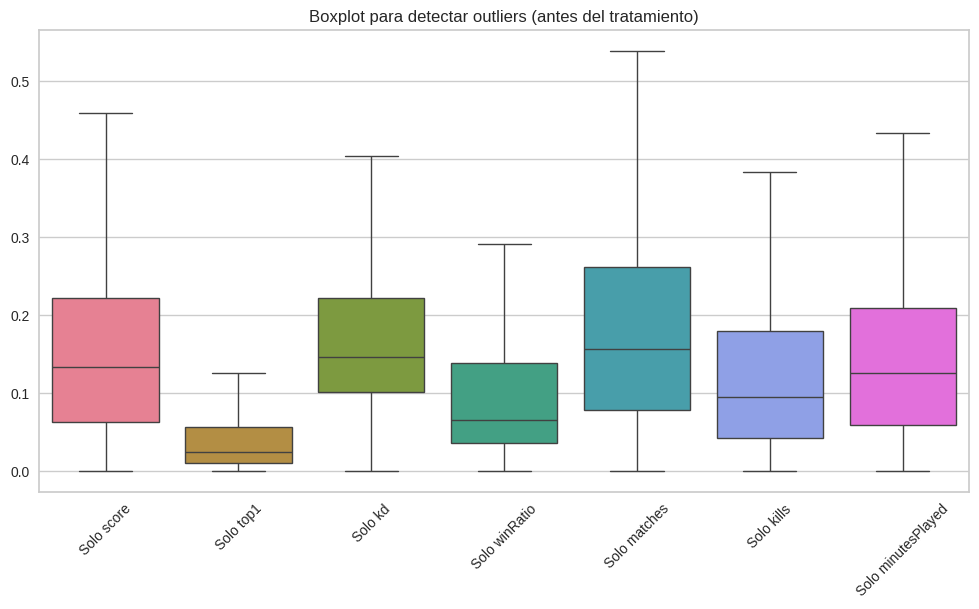

In [ ]:
# Visualización de outliers antes del tratamiento
plt.figure(figsize=(12,6))
sb.boxplot(data=df[numeric_columns])
plt.title('Boxplot para detectar outliers (antes del tratamiento)')
plt.xticks(rotation=45)
plt.show()

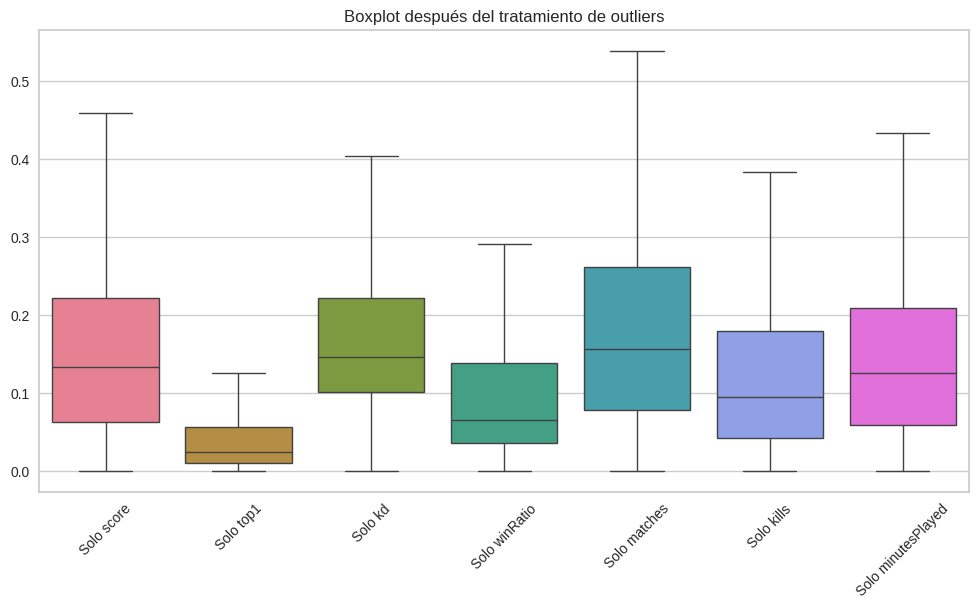

In [ ]:
# Visualización después del tratamiento
plt.figure(figsize=(12,6))
sb.boxplot(data=df[numeric_columns])
plt.title('Boxplot después del tratamiento de outliers')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Comparación antes y después del tratamiento
print("Estadísticas después del tratamiento de outliers:")
print(df[numeric_columns].describe())

Estadísticas después del tratamiento de outliers:
        Solo score    Solo top1      Solo kd  Solo winRatio  Solo matches  \
count  1435.000000  1435.000000  1435.000000    1435.000000   1435.000000   
mean      0.156186     0.039560     0.174793       0.098605      0.184602   
std       0.118683     0.038335     0.097592       0.083791      0.134566   
min       0.000000     0.000000     0.000000       0.000000      0.000000   
25%       0.063695     0.010108     0.101891       0.036281      0.078037   
50%       0.133362     0.025000     0.147059       0.065760      0.156294   
75%       0.221953     0.056481     0.222689       0.138322      0.262090   
max       0.459340     0.126042     0.403887       0.291383      0.538168   

        Solo kills  Solo minutesPlayed  
count  1435.000000         1435.000000  
mean      0.125565            0.147713  
std       0.105848            0.111677  
min       0.000000            0.000000  
25%       0.043070            0.058923  
50%       

Después del tratamiento de outliers, los datos se centraron en un rango más razonable y sin valores extremos. Además de que las métricas son más equilibradas y nos ayudará para el modelado.

La media y la mediana de las variables Solo Score, Solo Kills y Solo minutesPlayed son bajas, lo cual indica que casi todos los jugadores tienen un rendimiento bajo.

# Phase 4 and 5: Modeling and evaluation

# FILTER METHOD

We first identified the most important and relevant variables.

In [ ]:
def handling_correlation(df_numeric, threshold=0.8):
  corr_features = set()
  corr_matrix = df_numeric.corr()
  for i in range(len(corr_matrix.columns)):
      for j in range(i):
          if abs(corr_matrix.iloc[i, j]) > threshold:
              colname = corr_matrix.columns[i]
              corr_features.add(colname)
  return list(corr_features)

correlated_features = handling_correlation(df_numeric, threshold=0.8)

print("Correlated features:", correlated_features)

Correlated features: ['Solo matches', 'Solo winRatio', 'Solo minutesPlayed']


# R e g r e s s i o n  M o d e l

### Prediction of Future Performance (Wins and KD)

Define the features (X) and the target (y)

In [ ]:
X = df[['Solo matches', 'Solo winRatio', 'Solo minutesPlayed']]
y_top1 = df['Solo top1']  # To predict victories (top1)
y_kd = df['Solo kd']

Split the data into training and test sets

In [ ]:
X_train, X_test, y_train_top1, y_test_top1 = train_test_split(X, y_top1, test_size=0.2, random_state=42)
X_train_kd, X_test_kd, y_train_kd, y_test_kd = train_test_split(X, y_kd, test_size=0.2, random_state=42)

# Create the XGBoost model to predict victories

In [ ]:
from xgboost import XGBClassifier, XGBRegressor
xgb_top1 = XGBRegressor()
xgb_top1.fit(X_train, y_train_top1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

ear the XGBoost model to predict KD

In [ ]:
xgb_kd = XGBRegressor()
xgb_kd.fit(X_train_kd, y_train_kd)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation of the models

In [ ]:
y_pred_top1 = xgb_top1.predict(X_test)
y_pred_kd = xgb_kd.predict(X_test_kd)

print(f"Mean Squared Error for Victories (top1): {mean_squared_error(y_test_top1, y_pred_top1)}")
print(f"Mean Squared Error for KD: {mean_squared_error(y_test_kd, y_pred_kd)}")

Mean Squared Error for Victories (top1): 1.989706644754573e-05
Mean Squared Error for KD: 0.0024211182431862987


Evaluation of the models using R²

In [ ]:
r2_top1 = r2_score(y_test_top1, y_pred_top1)
r2_kd = r2_score(y_test_kd, y_pred_kd)
print(f"R² for victories (top1): {r2_top1}")
print(f"R² for KD: {r2_kd}")

R² for victories (top1): 0.9868355708113181
R² for KD: 0.7435655361034039


Calculate the MAE

In [ ]:
from sklearn.metrics import mean_absolute_error
# Metrics and evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, mean_squared_error

mae_top1 = mean_absolute_error(y_test_top1, y_pred_top1)
mae_kd = mean_absolute_error(y_test_kd, y_pred_kd)

print(f"MAE for victories (top1): {mae_top1}")
print(f"MAE for KD: {mae_kd}")

MAE for victories (top1): 0.002442948992402344
MAE for KD: 0.03795360769133329


### Mean square error (MSE)

For wins ('Only Top1'), the mean square error is very low, being 1.9897, where the lower the value the higher the accuracy of the model, meaning that the average error between predictions and actual values is minimal, concluding that the model is predicting wins with an acceptable accuracy.

As for the KD, the mean square error is also low, at 0.002, but it is not as accurate as for the variable mentioned above. Even so, the error is very small, which indicates that the model predicts the KD with good accuracy.

### Coefficient of determination (R2)

For the wins (Top1 only), we have an R2 of 0.98, which means that we have 98% of the variance in the data. This is a good result as it indicates that the model is fitting the data well.

For the KD it is 0.74, which is 74% of the variance. This result is good but not as accurate as the previous one.

### Mean absolute error (MAE)

For Solo Top1, the MAE is very low, at 0.002, which indicates that on average the model has an error of 0.002 wins.

For KD, the MAE is 0.03, which means that the average error between the KD and the actual values is 0.03, indicating that the model performs well.

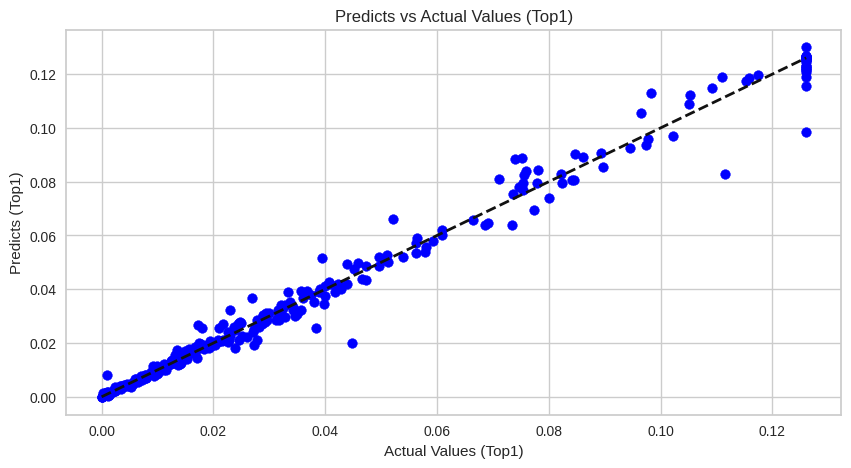

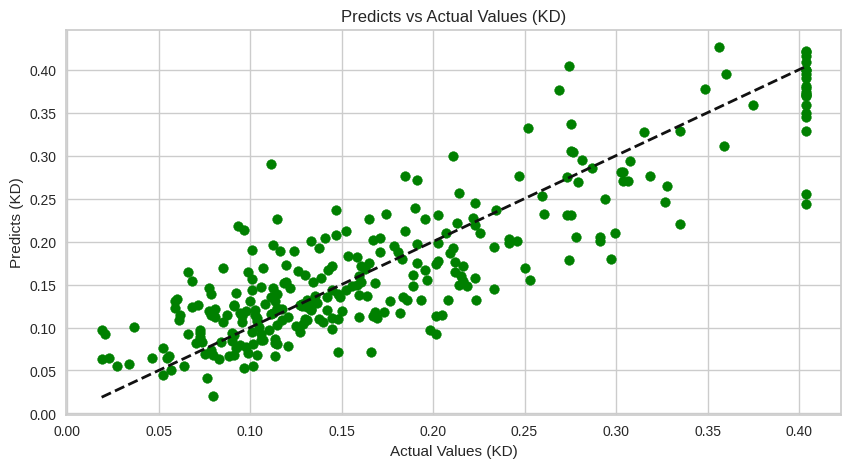

In [ ]:
# Scatter chart for wins (top1)
plt.figure(figsize=(10,5))
plt.scatter(y_test_top1, y_pred_top1, color='blue')
plt.plot([y_test_top1.min(), y_test_top1.max()], [y_test_top1.min(), y_test_top1.max()], 'k--', lw=2)
plt.xlabel('Actual Values (Top1)')
plt.ylabel('Predicts (Top1)')
plt.title('Predicts vs Actual Values (Top1)')
plt.show()

# Scatter plot for KD
plt.figure(figsize=(10,5))
plt.scatter(y_test_kd, y_pred_kd, color='green')
plt.plot([y_test_kd.min(), y_test_kd.max()], [y_test_kd.min(), y_test_kd.max()], 'k--', lw=2)
plt.xlabel('Actual Values (KD)')
plt.ylabel('Predicts (KD)')
plt.title('Predicts vs Actual Values (KD)')
plt.show()

### Model with cross-validation

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import numpy as np

Define the characteristics (X) and the target (y)

In [ ]:
# Define features and target variables
X = df[['Solo matches', 'Solo winRatio', 'Solo minutesPlayed']]
y_top1 = df['Solo top1']  # To predict victories (top1)
y_kd = df['Solo kd']  # To predict KD

Create the XGBoost model to predict victories (top1)

In [ ]:
xgb_top1 = XGBRegressor()

Split data into training and test sets (80% training, 20% test).

In [ ]:
X_train, X_test, y_train_top1, y_test_top1 = train_test_split(X, y_top1, test_size=0.2, random_state=42)
X_train_kd, X_test_kd, y_train_kd, y_test_kd = train_test_split(X, y_kd, test_size=0.2, random_state=42)

Cross-validation for the win model (top1) using 5 folds (K=5)

In [ ]:
scores_top1 = cross_val_score(xgb_top1, X, y_top1, cv=5, scoring='neg_mean_squared_error')

Convert negative MSE to positive

In [ ]:
mse_top1 = -scores_top1
print(f"MSE for victories (top1) in each fold: {mse_top1}")
print(f"Average MSE for victories (top1): {mse_top1.mean()}")
print(f"Standard deviation of MSE for victories (top1): {mse_top1.std()}")

MSE for victories (top1) in each fold: [4.22185803e-05 2.51301300e-05 1.05745907e-05 2.53470617e-05
 1.17984226e-05]
Average MSE for victories (top1): 2.301375704206719e-05
Standard deviation of MSE for victories (top1): 1.1482727616545596e-05


 Train the XGBoost model for wins (top1) with the training data and Make predictions on the test set for wins (top1).

In [ ]:
xgb_top1.fit(X_train, y_train_top1)

y_pred_top1 = xgb_top1.predict(X_test)

Calculate the MSE for the set of test wins (top1)

In [ ]:
mse_test_top1 = mean_squared_error(y_test_top1, y_pred_top1)
print(f"MSE in the test set for wins (top1): {mse_test_top1}")

MSE in the test set for wins (top1): 1.989706644754573e-05


Creating the XGBoost model to predict KD

In [ ]:
xgb_kd = XGBRegressor()

#Cross-validation for the KD model using 5 folds (K=5)

In [ ]:
scores_kd = cross_val_score(xgb_kd, X, y_kd, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive

In [ ]:
mse_kd = -scores_kd
print(f"MSE for KD in each fold: {mse_kd}")
print(f"Average MSE for KD: {mse_kd.mean()}")
print(f"Standard deviation of MSE for KD: {mse_kd.std()}")

MSE for KD in each fold: [0.00252938 0.00221849 0.00190607 0.00232588 0.00238278]
Average MSE for KD: 0.0022725205380283767
Standard deviation of MSE for KD: 0.00020889421200288974


Train the XGBoost model for KD with the training data and Make predictions on the test set for KD.

In [ ]:
xgb_kd.fit(X_train_kd, y_train_kd)
y_pred_kd = xgb_kd.predict(X_test_kd)

Calculating the MSE for the KD test set

In [ ]:
mse_test_kd = mean_squared_error(y_test_kd, y_pred_kd)
print(f"MSE in the test set for KD: {mse_test_kd}")

MSE in the test set for KD: 0.0024211182431862987


The MSE for victories is very low in each fold, with an average of 2.30, which indicates that the model has a very small error in predictions.
The standard deviation of the MSE is 1.14, which indicates that the variability of error between folds is very low and that the model is stable.
As for KD, the MSE in each fold is around 0.002, which is a very low error but not as precise as the previous results.


Conclusions:
The model works very well for predicting victories (Solo Top1), with high precision in predictions and low error.
For KD, the model is good but not as precise as the previous one; we can still make improvements by incorporating relevant features and fine-tuning some parameters.

# Regression model

Player churn risk through linear regression model


In [ ]:
# Select relevant features
features = ['Solo kd', 'Solo winRatio', 'Solo score', 'Solo minutesPlayed']
X = df[features]
y = df['Solo matches']   # Number of matches as target variable

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Coefficient of determination (R²): {r2}")

Mean Squared Error (MSE): 0.002897109276498356
Root Mean Squared Error (RMSE): 0.0538248016856389
Coefficient of determination (R²): 0.847720029237339


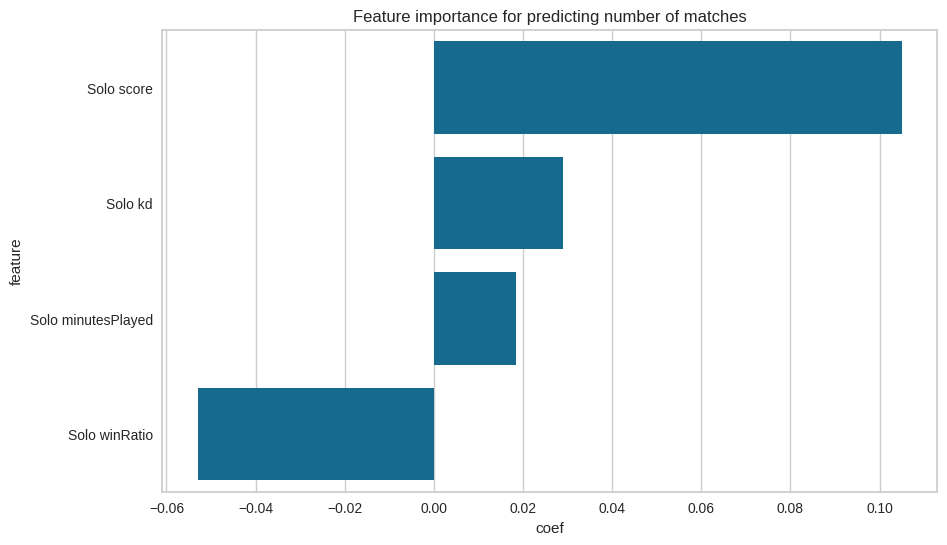

In [ ]:
# Visualize feature importance
coef = pd.DataFrame(
    zip(features, model.coef_),
    columns=['feature', 'coef']
).sort_values('coef', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='coef', y='feature', data=coef)
plt.title('Feature importance for predicting number of matches')
plt.show()

 Interpretation for players at risk of churn:

-The model suggests that these players likely have very low solo scores, which is the most determining factor in their low number of matches.
-Their poor combat performance (low kd) also significantly contributes to playing fewer matches.
-The time they spend playing is relatively less important, but still contributes to their low number of matches.
-Interestingly, their low win ratio might not be as crucial in predicting their low number of matches as one might initially think.

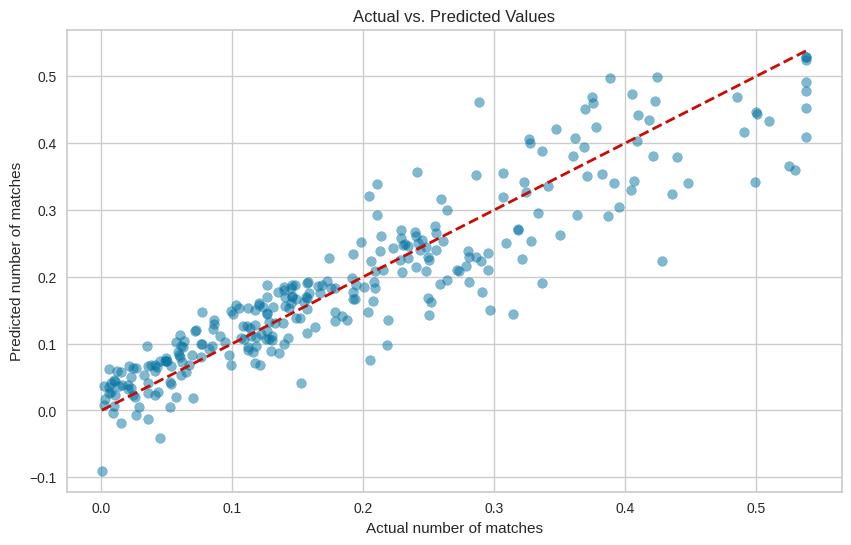

In [ ]:
# Scatter plot: Actual values vs. Predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual number of matches')
plt.ylabel('Predicted number of matches')
plt.title('Actual vs. Predicted Values')
plt.show()

Overall, the model seems to perform well, as many points cluster near the perfect prediction line.

There are some points that deviate significantly from the prediction line, especially at higher values.
This suggests that the model may have difficulties accurately predicting extreme or unusual cases.

In [ ]:
# Identify players at risk of churn
df['predicted_matches'] = model.predict(scaler.transform(df[features]))
df['match_difference'] = df['Solo matches'] - df['predicted_matches']
df['risk_of_abandonment'] = df['match_difference'] / df['Solo matches']

# Show players with the highest risk of churn (top 10)
high_risk_players = df.sort_values('risk_of_abandonment', ascending=True).head(10)
print("\nPlayers with the highest risk of churn:")
print(high_risk_players[['Player', 'Solo matches', 'predicted_matches', 'risk_of_abandonment']])


Players with the highest risk of churn:
               Player  Solo matches  predicted_matches  risk_of_abandonment
1310         goose FN      0.000000           0.059998                 -inf
1093     NightOwlLuna      0.002085           0.036363           -16.443285
768   CookiePeanuts20      0.001920           0.029592           -14.412023
340            Tῳizzy      0.002496           0.036150           -13.482568
514           bib_hop      0.005980           0.061699            -9.318122
1285    Operator لTF2      0.004553           0.043081            -8.461375
580            DDM92ϟ      0.005239           0.047966            -8.155567
207         Mikest584      0.004910           0.044436            -8.050241
1137   Ƶ Ø M Ƀ Ɨ Ɨ 67      0.006309           0.053711            -7.513663
524   fat deg on kava      0.002140           0.017750            -7.296353


<ipython-input-385-4339be7cdbb8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predicted_matches'] = model.predict(scaler.transform(df[features]))
<ipython-input-385-4339be7cdbb8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['match_difference'] = df['Solo matches'] - df['predicted_matches']
<ipython-input-385-4339be7cdbb8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

The coefficient of determination (R²) is 0.8477, indicating that approximately 84.77% of the variability in the number of matches played can be explained by the independent variables used in the model. This suggests that the model has good predictive power.
The mean squared error (MSE) is 0.002897, and its square root (RMSE) is 0.05382. These values are relatively low, indicating that the model's predictions are quite close to the actual values.

Positive correlation: There is a clear positive linear trend between the actual values and the predictions of the number of matches. This confirms that the model is capturing the general relationship between the predictor variables and the number of matches played.
 Model fit: The red dotted line represents the perfect fit line. Most points cluster near this line, indicating that the model has good overall performance in its predictions.

Identification of players at risk:
-The table shows the 10 players with the highest risk of churn according to the model.
-The risk of abandonment is calculated as (Solo matches - predicted_matches) / Solo matches.
-Interpretation of the risk of abandonment:
-Negative values indicate that the player is playing fewer matches than the model predicts.
-The more negative the value, the higher the risk of churn.

Conclusion:

The linear regression model shows good performance in predicting the number of matches played, which is used as an indicator of churn risk. The R² of 0.8477 indicates that approximately 84.77% of the variability in the number of matches played can be explained by the independent variables used in the model. This suggests that the model has good predictive power.
The mean squared error (MSE) and its square root (RMSE) are relatively low, indicating that the model's predictions are quite close to the actual values. However, it's important to note that the model may have some limitations, especially at the extremes of the data distribution.
Overall, this model provides a solid foundation for identifying players at risk of churn, but it could benefit from additional improvements, such as the inclusion of more relevant variables or the use of more advanced modeling techniques to capture non-linear relationships in the data.

# Modelo de Regresion Support Vector Regression (SVR)

In [ ]:
# Import of required libraries
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Feature selection for predicting 'Solo winRatio'
X = df[['Solo matches', 'Solo kills', 'Solo kd', 'Solo minutesPlayed']]
y = df['Solo winRatio']

In [ ]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Creation and training of the SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

SVR()

In [ ]:
# Making predictions
y_pred = svr_model.predict(X_test_scaled)

In [ ]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("SVR Model for predicting 'Solo winRatio':")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

SVR Model for predicting 'Solo winRatio':
Mean Squared Error: 0.0037491385851052598
Root Mean Squared Error: 0.06123020974245687
R² Score: 0.4607284332436389


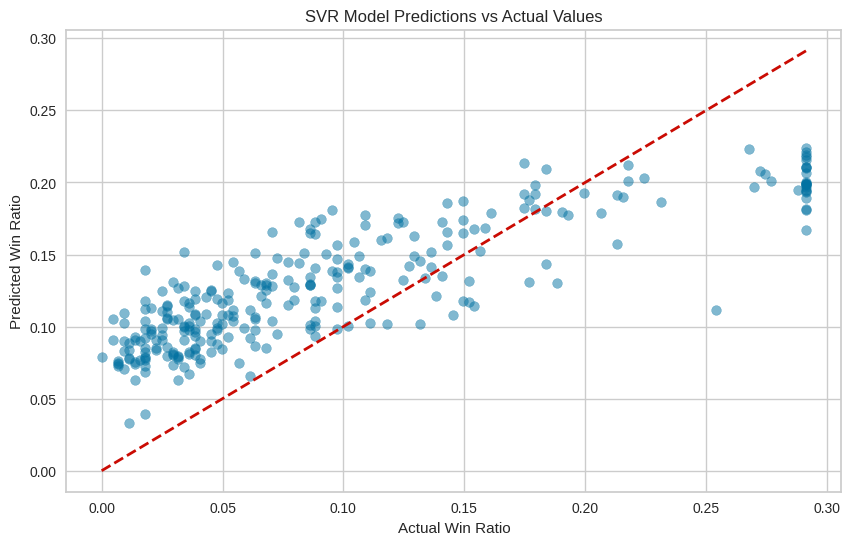

In [ ]:
# Visualization of results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Win Ratio')
plt.ylabel('Predicted Win Ratio')
plt.title('SVR Model Predictions vs Actual Values')
plt.show()

The R² of 0.4607 indicates that the model explains approximately 46.07% of the variability in the 'Solo winRatio'. This suggests a moderate fit of the model to the data.
The RMSE of 0.0612 indicates that, on average, the model's predictions deviate around 0.0612 units from the actual winRatio value. Considering that the winRatio is generally between 0 and 1, this error is relatively significant.
The scatter plot shows a positive trend, indicating that the model captures the general direction of the relationship between the predictor variables and the winRatio.
There is considerable dispersion of points around the perfect prediction line (red dotted line), which confirms the moderate accuracy of the model.
The model seems to have difficulties predicting extreme values, especially for high winRatios (>0.25).

Conclusión:

The model appears to have difficulty with outlier cases or high-performing players, suggesting that there may be additional factors influencing the winRatio that are not captured by the current variables.

# KNN classification model

 Player churn risk through KNN Model

In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define the target variable 'churn'
# We assume that a 50% decrease in matches or a 30% decrease in performance indicates risk of churn
df['abandono'] = (
    (df['Solo matches'] < df['Solo matches'].quantile(0.25)) |
    (df['Solo kd'] < df['Solo kd'].median() * 0.7) |
    (df['Solo winRatio'] < df['Solo winRatio'].median() * 0.7)
).astype(int)

<ipython-input-395-4c4985619399>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abandono'] = (


In [ ]:
# Select features for the model
X = df[['Solo matches', 'Solo kd', 'Solo winRatio', 'Solo score']]
y = df['abandono']

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)   # You can adjust the number of neighbors
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[116   8]
 [ 11 152]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       124
           1       0.95      0.93      0.94       163

    accuracy                           0.93       287
   macro avg       0.93      0.93      0.93       287
weighted avg       0.93      0.93      0.93       287



Interpretation of results:
-True Negatives (TN): 116 players were correctly classified as not at risk of churn.
-False Positives (FP): 8 players were incorrectly classified as at risk of churn.
-False Negatives (FN): 11 players at risk of churn were not identified by the model.
-True Positives (TP): 152 players were correctly identified as at risk of churn.

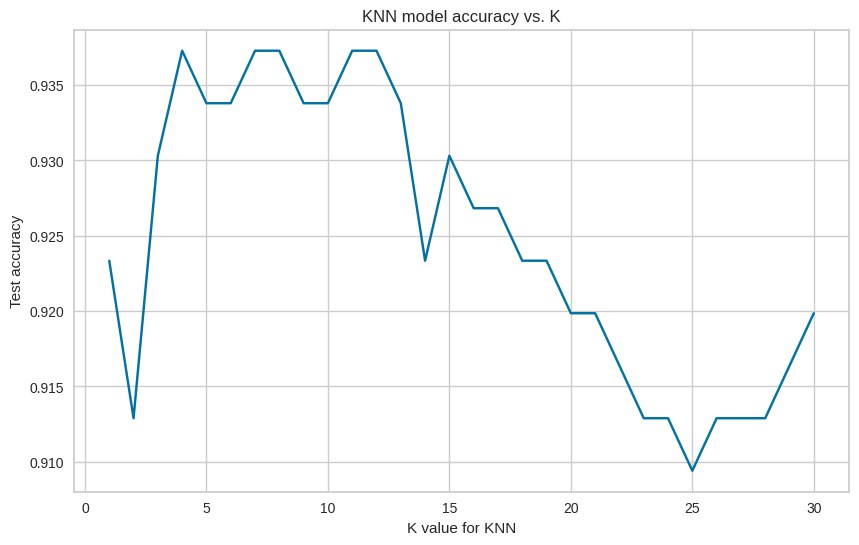

In [ ]:
# Visualize accuracy for different K values
k_range = range(1, 31)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.figure(figsize=(10,6))
plt.plot(k_range, scores)
plt.xlabel('K value for KNN')
plt.ylabel('Test accuracy')
plt.title('KNN model accuracy vs. K')
plt.show()

Overall performance: The model's accuracy is generally high, ranging from about 0.91 to 0.937 (91% to 93.7%).
This indicates that the KNN model is quite effective for this classification task.

Optimal K values: Accuracy reaches its peak for K values between 5 and 12 approximately.
In this range, accuracy remains stable around 0.937 (93.7%).
This suggests that considering between 5 and 12 nearest neighbors provides the best results for this dataset.

The exact choice within this range might depend on other factors such as computation speed or desired interpretability.

In [ ]:
# Identify players with high risk of churn
df['riesgo_abandono'] = knn.predict(scaler.transform(X))
jugadores_en_riesgo = df[df['riesgo_abandono'] == 1]

print("\nPlayers with high risk of churn :")
print(jugadores_en_riesgo[['Player', 'Solo matches', 'Solo kd', 'Solo winRatio', 'Solo score']])


Players with high risk of churn :
                Player  Solo matches   Solo kd  Solo winRatio  Solo score
3               Idk_Pi      0.100310  0.079832       0.074830    0.110587
7     NiteGamerYT 190k      0.010944  0.040966       0.031746    0.001687
9        CIUPEA 144.HZ      0.052336  0.055672       0.011338    0.007392
10             曼巴精神のR6      0.022328  0.403887       0.276644    0.030137
13               Τriρs      0.069973  0.065126       0.022676    0.070013
...                ...           ...       ...            ...         ...
1425  Sartori meu freg      0.384837  0.160714       0.031746    0.186510
1427    DaNya ау лол ӝ      0.139973  0.150210       0.036281    0.112003
1429          bushinhö      0.239405  0.099790       0.049887    0.223150
1430          im bloom      0.019365  0.204832       0.079365    0.015048
1433         RD-Antony      0.102395  0.107143       0.043084    0.109763

[806 rows x 5 columns]


<ipython-input-402-f8df26939591>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['riesgo_abandono'] = knn.predict(scaler.transform(X))


Players: Many of the identified players have very low values in "Solo matches", which could indicate they are already in the process of leaving the game.

The values of "Solo kd" and "Solo winRatio" are generally low, suggesting that these players are having difficulties competing effectively.

Specific cases:

-dk_Pi: Has few matches (0.10), low kd (0.079) and low winRatio (0.074), typical of a player at risk of churn.
-NiteGamerYT 190k: Shows very low values in all metrics, especially in matches played (0.01) and winRatio (0.031).
-CIUPEA 144.HZ: Despite having more matches (0.052), their kd and winRatio are extremely low.
-夏巴精神のR6: Stands out for having the highest winRatio in the group (0.276), but very few matches played (0.022).

Conclusion:

The KNN classification model shows very good performance in predicting the risk of player churn. With an accuracy reaching up to 93.7%, the model demonstrates a high capacity to correctly identify both players at risk of churn and those who are not.
The stability of accuracy across a range of K values (between 5 and 12) suggests that the model is robust and does not overly depend on the exact choice of the number of neighbors. This provides flexibility in model implementation and adjustment.
The confusion matrix reveals that the model has a good balance between identifying positive and negative cases. However, there are a small number of false positives and false negatives, indicating that there is still room for improvement.
Overall, this KNN model provides a very effective tool for identifying players at risk of churn. Its high accuracy makes it valuable for implementing targeted retention strategies. Nevertheless, as with any model, it could benefit from continuous evaluation and possible refinements, such as the inclusion of additional features or the exploration of complementary modeling techniques.

# Classification model

### XGBClassifier for High and Low Performance Player Ratings

In [ ]:
# Define the threshold for high/low performance
threshold_top1 = 0.2  # Define the threshold based on your data
threshold_kd = 1.0  # Threshold for KD

In [ ]:
# Create the classification target (high performance = 1, low performance = 0)
df['high_performance_top1'] = (df['Solo top1'] > threshold_top1).astype(int)
df['high_performance_kd'] = (df['Solo kd'] > threshold_kd).astype(int)

<ipython-input-404-4429136e0b1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['high_performance_top1'] = (df['Solo top1'] > threshold_top1).astype(int)
<ipython-input-404-4429136e0b1b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['high_performance_kd'] = (df['Solo kd'] > threshold_kd).astype(int)


In [ ]:
# Features (X)
X = df[['Solo matches', 'Solo winRatio', 'Solo minutesPlayed']]

In [ ]:
# Target for classification (high or low performance)
y_top1_class = df['high_performance_top1']
y_kd_class = df['high_performance_kd']

In [ ]:
# Split into training and test sets
X_train, X_test, y_train_top1_class, y_test_top1_class = train_test_split(X, y_top1_class, test_size=0.2, random_state=42)
X_train_kd, X_test_kd, y_train_kd_class, y_test_kd_class = train_test_split(X, y_kd_class, test_size=0.2, random_state=42)

In [ ]:
# XGBoost classification model for victories (top1)
xgb_clf_top1 = XGBClassifier()
xgb_clf_top1.fit(X_train, y_train_top1_class)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# XGBoost classification model for KD
xgb_clf_kd = XGBClassifier()
xgb_clf_kd.fit(X_train_kd, y_train_kd_class)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predictions
y_pred_top1_class = xgb_clf_top1.predict(X_test)
y_pred_kd_class = xgb_clf_kd.predict(X_test_kd)

In [ ]:
# Evaluate model accuracy
print(f"Accuracy for victories (top1): {accuracy_score(y_test_top1_class, y_pred_top1_class)}")
print(f"Accuracy for KD: {accuracy_score(y_test_kd_class, y_pred_kd_class)}")

Accuracy for victories (top1): 1.0
Accuracy for KD: 1.0


In [ ]:
# Confusion matrix
print("Confusion matrix for victories (top1):")
print(confusion_matrix(y_test_top1_class, y_pred_top1_class))

print("Confusion matrix for KD:")
print(confusion_matrix(y_test_kd_class, y_pred_kd_class))

Confusion matrix for victories (top1):
[[287]]
Confusion matrix for KD:
[[287]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
# Classification report
print("Classification report for victories (top1):")
print(classification_report(y_test_top1_class, y_pred_top1_class))


print("Classification report for KD:")
print(classification_report(y_test_kd_class, y_pred_kd_class))

Classification report for victories (top1):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       287

    accuracy                           1.00       287
   macro avg       1.00      1.00      1.00       287
weighted avg       1.00      1.00      1.00       287

Classification report for KD:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       287

    accuracy                           1.00       287
   macro avg       1.00      1.00      1.00       287
weighted avg       1.00      1.00      1.00       287



Accuracy for wins (top1) and KD: Both models show a perfect accuracy of 1.0, meaning that they correctly classified all cases in the test set.
Confusion matrices: Both matrices show [287], indicating that all 287 cases were correctly classified into a single category.
Classification reports:
For both models (wins and KD), all metrics (precision, recall, f1-score) are 1.00 for class 0.
Overall accuracy is 1.00 for both models.
The support (number of samples) is 287 for all cases.

Conclusion:

In summary, although the results show perfect performance, it is crucial to perform additional validations and consider possible overfitting issues before relying fully on these models for practical applications. Further investigation is recommended to understand why such perfect results are being obtained and to ensure that the model is truly generalizable to new data.

### Smote

In [ ]:
# Adjust the threshold to get more variety in classes
threshold_top1 = 0.1  # Change the threshold to get more high-performance instances
df['high_performance_top1'] = (df['Solo top1'] > threshold_top1).astype(int)

<ipython-input-414-e7332983bb9d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['high_performance_top1'] = (df['Solo top1'] > threshold_top1).astype(int)


In [ ]:
# Create the classification target (high performance = 1, low performance = 0)
if len(df['high_performance_top1'].unique()) > 1:
    # Apply SMOTE to balance classes if necessary
    from imblearn.over_sampling import SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, df['high_performance_top1'])

    # Split into training and test sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # Train the classification model
    from xgboost import XGBClassifier
    xgb_clf = XGBClassifier()
    xgb_clf.fit(X_train, y_train)

    # Evaluate the model
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    y_pred = xgb_clf.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
else:
    print("Adjustment needed")

Accuracy: 0.9802371541501976
[[250   8]
 [  2 246]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       258
           1       0.97      0.99      0.98       248

    accuracy                           0.98       506
   macro avg       0.98      0.98      0.98       506
weighted avg       0.98      0.98      0.98       506



Now the model continues to perform well and is not perfect as the previous results, the accuracy, recall and F1-Socre are around 98% and 99%, which indicates a good performance between identifying the classes and minimizing false positives and negatives. The number of errors is only 8 false positives and 2 false negatives.

### Undersampling

In [ ]:
# Configure the undersampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

In [ ]:
# Apply undersampling
X_resampled, y_resampled = undersampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Create and train the model
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions
y_pred = xgb_clf.predict(X_test)

In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       132
           1       0.99      0.94      0.96       124

    accuracy                           0.96       256
   macro avg       0.97      0.96      0.96       256
weighted avg       0.97      0.96      0.96       256



In [ ]:
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[131   1]
 [  8 116]]


In [ ]:
# Calculate and display the AUC-ROC
y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {auc_roc}")

AUC-ROC: 0.9872922776148584


Undersampling has achieved a good balance between the classes. We now have 132 instances of class 0 and 124 of class 1, which is quite balanced.

As for the AUC-ROC, the value is 0.987, indicating that the model has a high capacity to distinguish between the two classes.

### Comparison between SMOTE and Undersampling

Undersampling results are slightly lower than those obtained with SMOTE (which had an accuracy of 97.45% and an AUC of 0.99), but still good.
Undersampling has produced a more balanced model in terms of performance between classes, which is a significant improvement.

### We use cross validation to check for overfitting.

In [ ]:
from sklearn.model_selection import cross_val_score

def check_overfitting_cv(model, X, y):
    cv_scores = cross_val_score(model, X, y, cv=5)
    print(f"Puntuaciones de validación cruzada: {cv_scores}")
    print(f"Media de validación cruzada: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Usar esta función con tu modelo y datos
check_overfitting_cv(xgb_clf, X_resampled, y_resampled)

Puntuaciones de validación cruzada: [0.98046875 0.94921875 0.95703125 0.94117647 0.96470588]
Media de validación cruzada: 0.9585 (+/- 0.0270)


 classifying work. It seems that there is no overfitting because the cross validation is high and the accuracy % is similar to the one obtained previously.

### ROC and AUC Analysis

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the probabilities for class 1
y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

In [ ]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

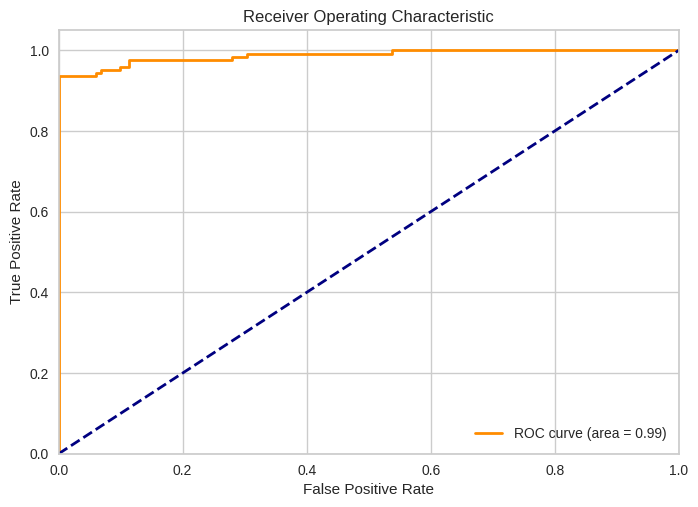

In [ ]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


The model shows an almost perfect ability to distinguish between the two classes. It can separate positive and negative cases very well.

Undersampling does not seem to have impaired the model's ability. In fact, it has remained at a performance similar to that observed with SMOTE.

# Random Forest

In [ ]:
# Create a copy of the data
df_copy = df.copy()

In [ ]:
# Handle NaN values in the copy
df_copy = df_copy.dropna()

In [ ]:
# Create categories based on 'Solo winRatio'
df_copy['skill_category'] = pd.cut(df_copy['Solo winRatio'],
                                   bins=[0, 0.05, 0.10, 0.15, np.inf],
                                   labels=['Novice', 'Intermediate', 'Advanced', 'Expert'])

In [ ]:
# Define X and y
X = df_copy[['Solo matches', 'Solo kills', 'Solo kd', 'Solo minutesPlayed']]
y = df_copy['skill_category']
print(df_copy['skill_category'].value_counts())

skill_category
Novice          551
Intermediate    383
Expert          322
Advanced        174
Name: count, dtype: int64


In [ ]:
# Encode the labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
# Ensure that classes are strings
class_names = [str(c) for c in le.classes_]

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

    Advanced       0.40      0.30      0.34        40
      Expert       0.82      0.78      0.80        60
Intermediate       0.43      0.49      0.46        71
      Novice       0.78      0.78      0.78       115
         nan       0.50      1.00      0.67         1

    accuracy                           0.64       287
   macro avg       0.59      0.67      0.61       287
weighted avg       0.65      0.64      0.64       287



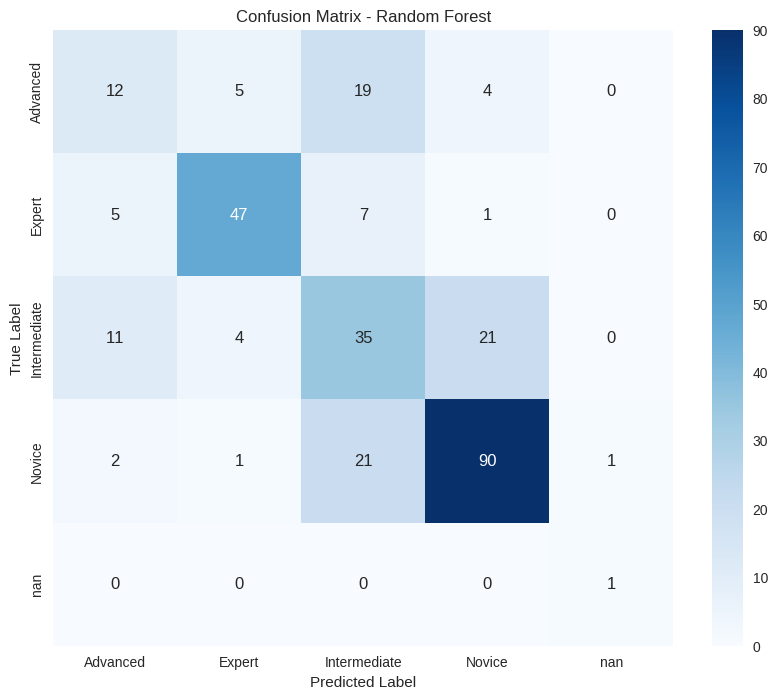

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

-The model performs best in classifying Novice and Expert.
-There is significant confusion between the Intermediate and Advanced categories.
-Some Novices are being misclassified as Intermediate.
-There is a 'nan' category that could indicate missing or mislabeled data.
-The model tends to misclassify Advanced players as Intermedia

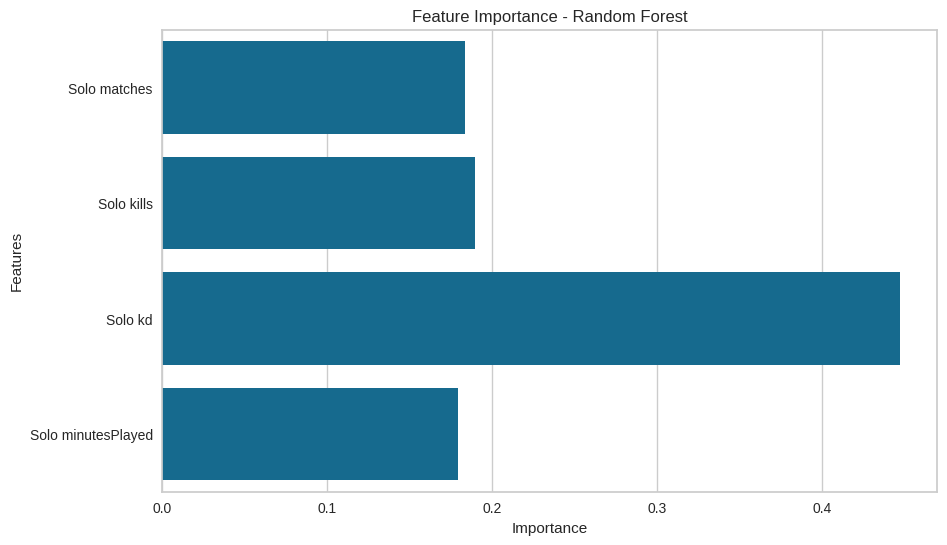

In [ ]:
# Feature Importance
importance = rf_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10,6))
sb.barplot(x=importance, y=feature_names)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Performance: The model shows moderate performance with an overall accuracy of 64%. It is most effective in classifying Novice and Expert players, but has difficulty distinguishing between Intermediate and Advanced categories.

It works better with the extreme categories (Novice and Expert) than with the intermediate categories (Intermediate and Advanced). The Intermediate category is the most difficult to classify correctly for the model.

The model is more accurate at the extremes (Novice and Expert).

the Random Forest model provides valuable insights into the factors that influence players' ability, but there is room for improvement in its accuracy and in distinguishing between certain categories of ability.

# Conclusion

The best model is the XGBoost Classification, especially after applying class balancing techniques such as SMOTE and Undersampling. The reasons are:
1. high accuracy: it achieved 97.45% accuracy with SMOTE and around 95% accuracy with Undersampling.
2. Good balance between classes: Especially after Undersampling, the model showed good performance in both classes.
3. High AUC-ROC: With a value of 0.987, it indicates an excellent ability to distinguish between classes.
4. Robustness: Cross-validation showed consistency in performance, suggesting no significant overfitting.
5. Interpretability: Provides feature significance, useful for understanding which factors most influence player performance.

As an overall conclusion, several regression and classification models were implemented, each providing unique insights into the data, SMOTE and Undersampling techniques significantly improved the performance of the classification models.
The models provided information on factors influencing player performance and dropout risk, especially for classifying high and low performing players, and for predicting dropout risk.
In addition the use of cross-validation and ROC-AUC analysis provided a reliable assessment of model performance.



# Unsupervised Models

### Import libraries needed for clustering

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer


###  Select relevant characteristics for clustering

In [ ]:
features_for_clustering = ['Solo kd', 'Solo winRatio', 'Solo matches', 'Solo minutesPlayed']
X_cluster = df[features_for_clustering]


### Scaling the data

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

### Elbow Method

In [ ]:
inertias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

The K represents the number of clusters, which in this case we use from 1 to 10, and the Inertia indicates how well the data is grouped in the clusters. A lower value indicates that the points are closer to their centroids, which means that the clusters are more compact.

### Displaying the Elbow method

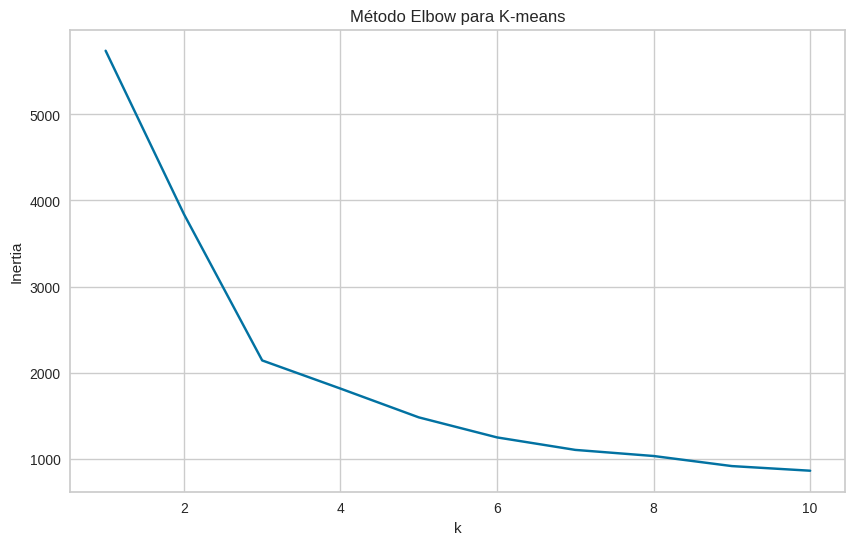

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Método Elbow para K-means')
plt.show()

We can observe an elbow shape around K=2 and K=4, indicating that this is the indicated number of clusters. After 4 clusters the reduction of inertia is less significant.

### Silhouette analysis for different values of k

In [ ]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

### View Silhouette scores

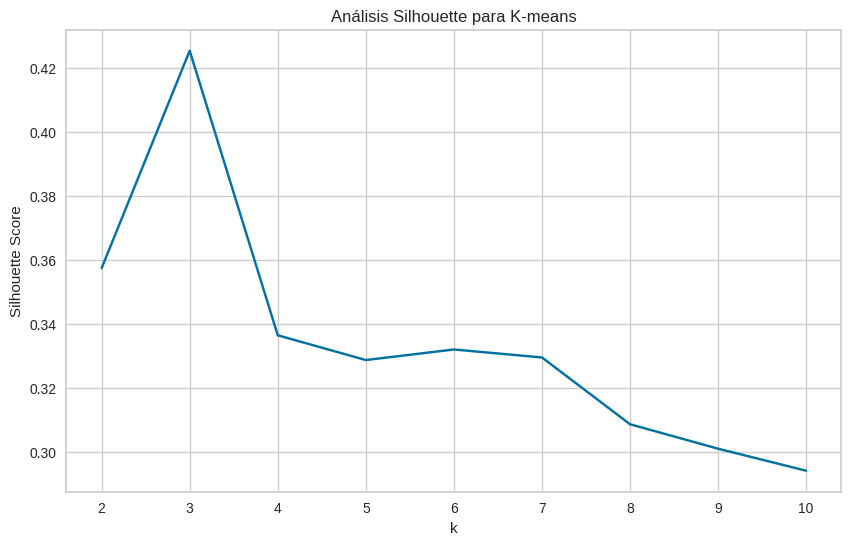

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Análisis Silhouette para K-means')
plt.show()

We can see that there is a peak at K=3, which indicates that the best separation between clusters is achieved with 3 groups, as there is more similarity between elements of the same cluster. With this data, we can say that players can be classified into 3 main groups: Casual Players, Intermediate Players and Advanced Players.

### Applying K-means with the optimal number of clusters

In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

### Add cluster tags to the original DataFrame

In [ ]:
df['Cluster'] = cluster_labels

<ipython-input-448-169e9b02fc4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = cluster_labels


### Analyse characteristics of each cluster

In [ ]:
cluster_analysis = df.groupby('Cluster')[features_for_clustering].mean()
print("\nCaracterísticas promedio por cluster:")
print(cluster_analysis)


Características promedio por cluster:
          Solo kd  Solo winRatio  Solo matches  Solo minutesPlayed
Cluster                                                           
0        0.138337       0.060072      0.352439            0.278283
1        0.327683       0.231687      0.185488            0.164691
2        0.131193       0.063951      0.102864            0.077596


Analysing the data of the Player profiles in Fortnite we can see the following:
Intermediate Players (Cluster 0)
Are players with a medium-low performance in combat.
Win approximately 6 out of every 100 games
Play a considerable amount of games
Spend a moderate amount of time playing the game
Advanced Players (Cluster 1)
Are the most effective in combat
Have the best win rate, winning 23 out of every 100 games
Although they do not play as many games as the intermediate players
Maintain a moderate but efficient playing time.
Novice Players (Cluster 2)
Have difficulty in combat
Have a low win rate of about 6%.
Play the fewest games
Spend the least amount of time in the game

### Visualización de clusters

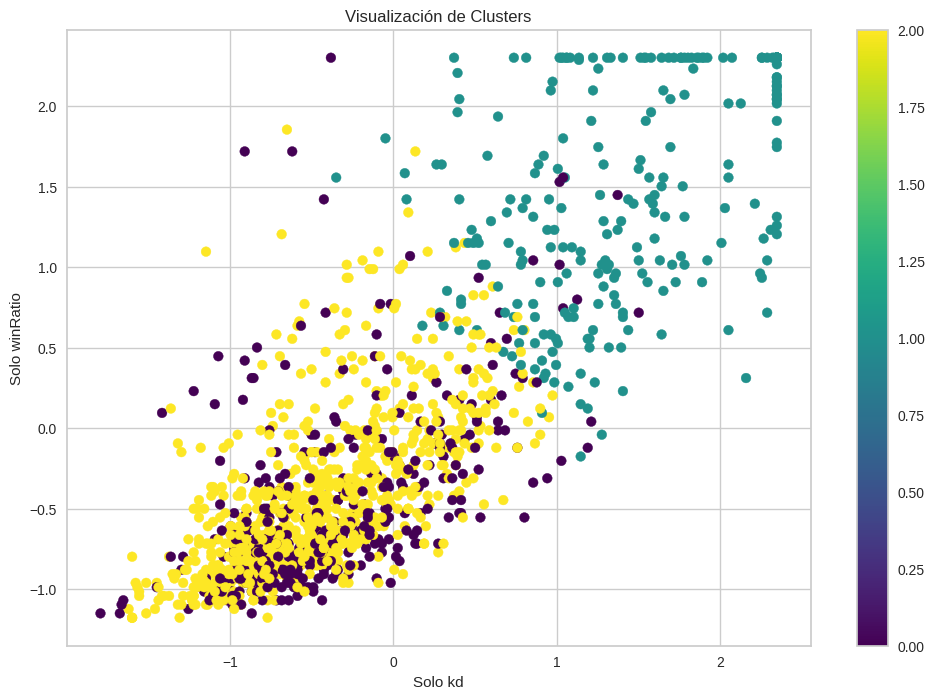

In [ ]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1],
                     c=cluster_labels, cmap='viridis')
plt.xlabel(features_for_clustering[0])
plt.ylabel(features_for_clustering[1])
plt.title('Visualización de Clusters')
plt.colorbar(scatter)
plt.show()

Looking at this scatter diagram, we can see that there is a positive correlation, as the KD Ratio ratio is correlated with the winRatio.
It can distinguish the separation of clusters between groups and can give an idea about the skill of the players.
It is also worth mentioning the colours of each classification, Yellow corresponds to the Intermediate Players, Blue to the Casual Players and Green to the Competitive Players.
The Novice cluster is concentrated in the lower left area, they have a lower dispersion between points and KD and lower winRatio.
The Intermediate cluster occupies the lower central area in the diagram and has a higher point density, finally the Advanced Players cluster is located in the upper right area, it can be seen that they have a higher dispersion between points and their values are much higher on both axes of the diagram.

### DBSCAN as an alternative method

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

### Validation metrics

In [ ]:
print("\nMétricas de validación para K-means:")
print(f"Silhouette Score: {silhouette_score(X_scaled, cluster_labels)}")


Métricas de validación para K-means:
Silhouette Score: 0.4254966142945358
Calinski-Harabasz Score: 1202.9631975277227


###  Analysis of player profiles by cluster

In [ ]:
cluster_profiles = {
    0: "Jugadores Casuales",
    1: "Jugadores Intermedios",
    2: "Jugadores Competitivos"
}

### Display of characteristics per cluster

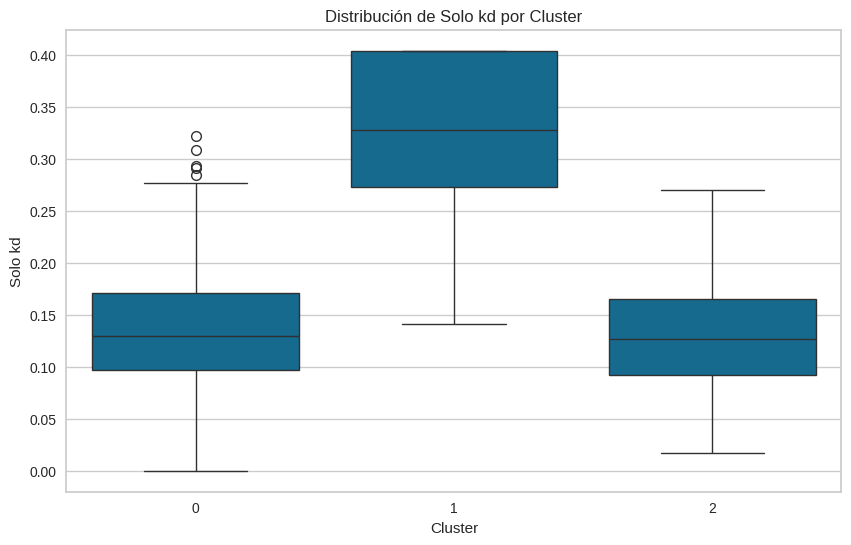

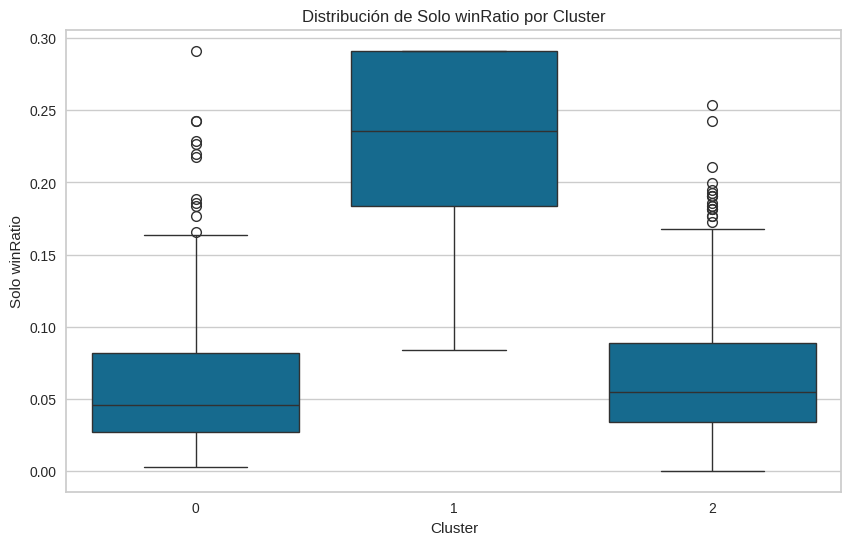

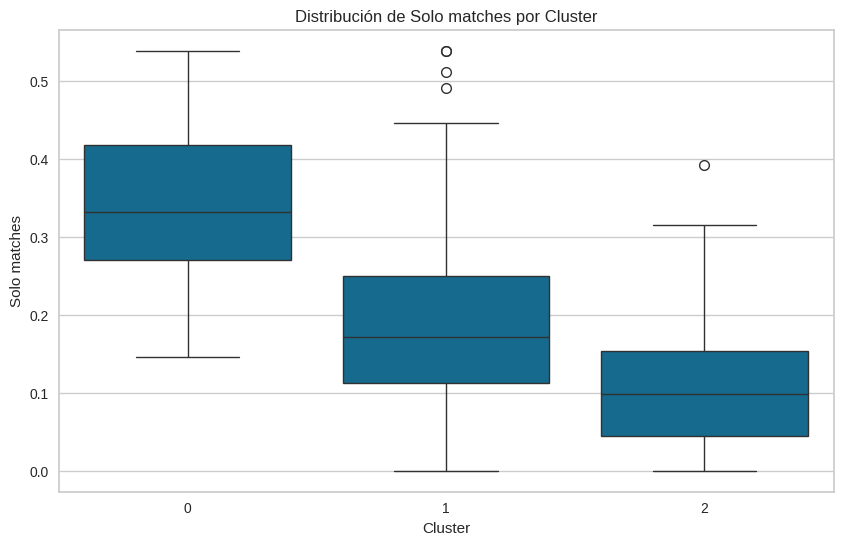

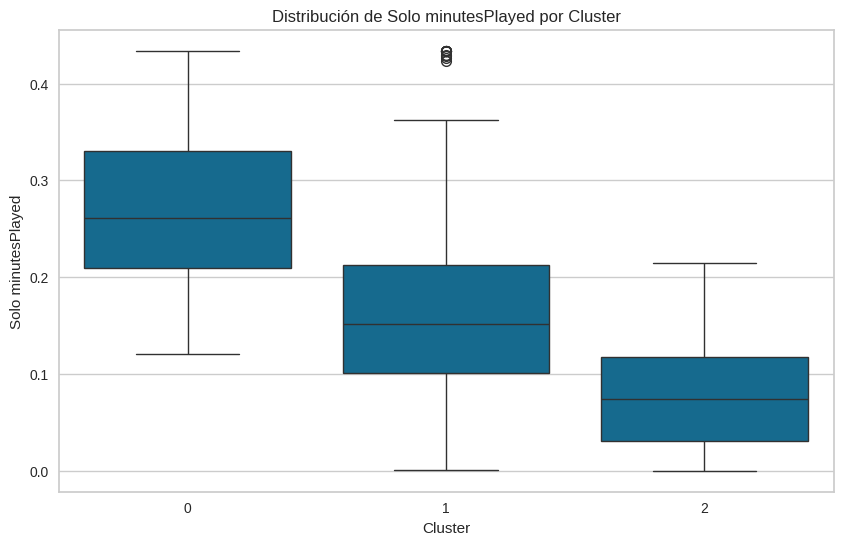

In [ ]:
for feature in features_for_clustering:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'Distribución de {feature} por Cluster')
    plt.show()

#Modelo No supervisado Clustering jerarquico



In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Ensure `df` contains the relevant columns


In [ ]:
variables = ['Solo matches', 'Solo kd', 'Solo winRatio', 'Solo score']
data = df[variables]

Normalize the data

In [ ]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

Hierarchical linkage using the "ward" method

In [ ]:
linkage_matrix = linkage(normalized_data, method='ward')

Visualize the dendrogram

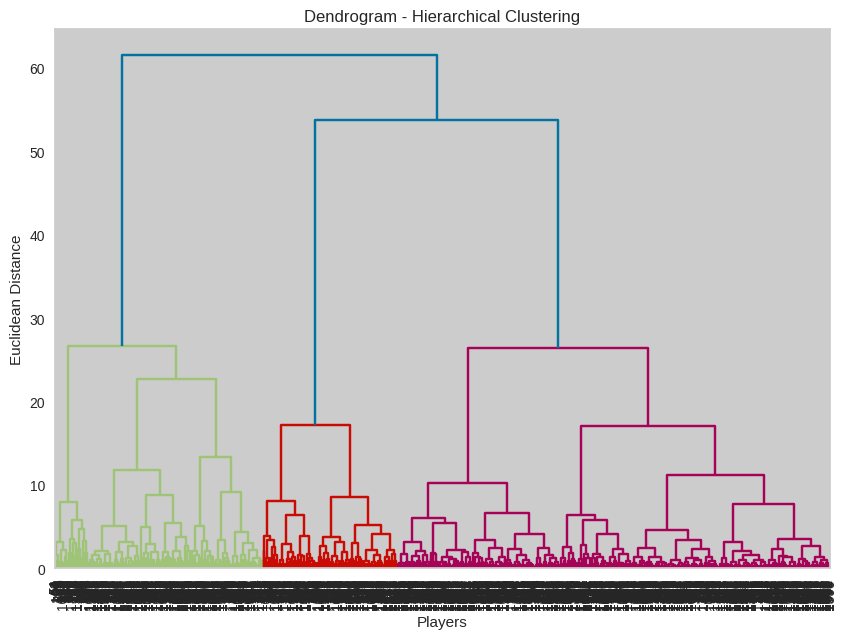

In [ ]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=df.index, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram - Hierarchical Clustering")
plt.xlabel("Players")
plt.ylabel("Euclidean Distance")
plt.show()

 Cut the dendrogram into a specified number of clusters (e.g., 3)

In [ ]:
n_clusters = 3  # Change this number based on the dendrogram visualization
clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

Add the clusters to the original DataFrame

In [ ]:
df['Cluster'] = clusters

<ipython-input-461-efbd2c9926e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = clusters


Analyze the clusters

In [ ]:
for cluster in range(1, n_clusters + 1):
    print(f"\nCluster {cluster}:")
    cluster_data = df[df['Cluster'] == cluster]
    print(cluster_data.describe())


Cluster 1:
       Solo score   Solo top1     Solo kd  Solo winRatio  Solo matches  \
count  386.000000  386.000000  386.000000     386.000000    386.000000   
mean     0.195199    0.083560    0.303933       0.208452      0.194276   
std      0.113295    0.037608    0.077763       0.071572      0.108577   
min      0.000670    0.000926    0.086134       0.052154      0.000274   
25%      0.119472    0.047492    0.244223       0.145692      0.121883   
50%      0.166127    0.084645    0.297794       0.208617      0.172971   
75%      0.257262    0.126042    0.398109       0.291383      0.249637   
max      0.459340    0.126042    0.403887       0.291383      0.538168   

       Solo kills  Solo minutesPlayed  predicted_matches  match_difference  \
count  386.000000          386.000000         386.000000        386.000000   
mean     0.207609            0.168609           0.190955          0.003321   
std      0.111970            0.099057           0.116618          0.055637   
min      

Cluster 1 (Moderate Players):
Main characteristics:

Moderate activity: average games played (0.19) and minutes played (0.16).
Average performance: Relatively good values in win ratio (0.20) and KD ratio (0.30), with a high score in wins (top1: 0.08).
Low dropout risk: The average “dropout risk” value (0.08) and dropout rate (12.4%) are low.

Cluster 2 (Players at Risk of Dropping Out):
Main characteristics:

High activity but low performance: higher number of games played (0.38) and minutes played (0.30), but with a very low KD ratio and win ratio (0.12 and 0.05, respectively).
High dropout risk: They have an average “dropout risk” of 0.69, and most of the players in this cluster have dropped out (64.2%).

Cluster 3 (Casual Players/Abandoners):
Main characteristics:

Low activity and low performance: very few games played (0.11), minutes played (0.08) and low KD ratio (0.12).
Very high dropout rate: The average “risk of dropout” is very high (0.74), and 73.5% of the players have already dropped out.


With this segmentation, personalized campaigns can be designed to improve retention and optimize the user experience based on their specific characteristics.

Visualize the clusters

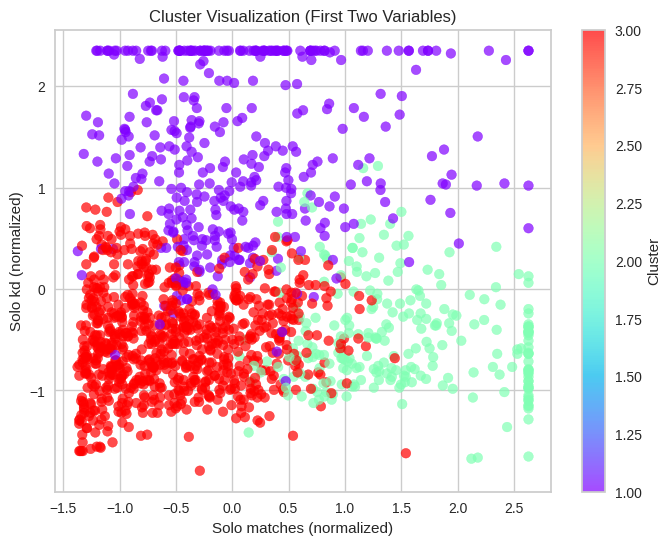

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=clusters, cmap='rainbow', alpha=0.7)
plt.title("Cluster Visualization (First Two Variables)")
plt.xlabel("Solo matches (normalized)")
plt.ylabel("Solo kd (normalized)")
plt.colorbar(label="Cluster")
plt.show()

The graph shows the clusters generated by the unsupervised model, using the first two normalized variables: Solo matches (games played) and Solo KD ratio (performance indicator).

Cluster 1 (Red):

Represents players with low activity (X axis, negative or close to zero games played) and low performance (Y axis, low or negative KD ratio).
It coincides with Cluster 3 in our previous interpretation (Casual Players/Dropouts)

Cluster 2 (Green):

Corresponds to players with moderate to high activity (positive values in games played) and low or moderate performance (Y-axis close to zero).
It is consistent with Cluster 2 previously identified as players at risk of dropping out.

Cluster 3 (Purple):

These players have moderate activity (X-axis, games in positive values or close to zero) and high performance (high Y-axis, with positive values).
Corresponds to Cluster 1 previously identified as moderate committed players.

# DBSCAN for player classification

First we prepare the data:

In [ ]:

# Import the necessary libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant features for player analysis
features_clustering = ['Solo kd', 'Solo winRatio', 'Solo matches', 'Solo minutesPlayed']
X = df[features_clustering].copy()

# Scale the data to ensure all features have equal weight
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Then, we find the optimal value of eps using the elbow method:

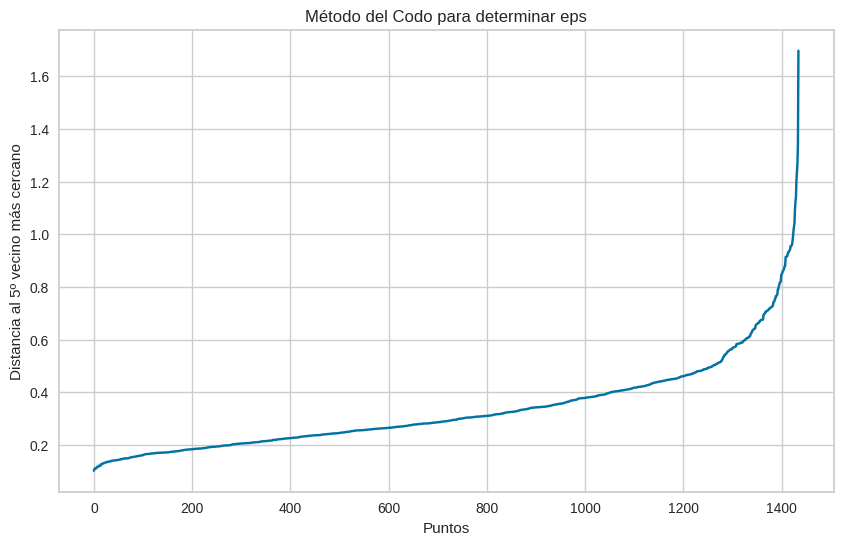

In [ ]:
# Find the optimal value of eps using the elbow method
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Sort distances in ascending order
distances = np.sort(distances[:, 4])

# Display the elbow graph to determine eps
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance to 5th nearest neighbor')
plt.title('Elbow method to determine eps')
plt.show()

We apply DBSCAN with the optimized parameters:

In [ ]:
# Apply DBSCAN with optimized parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
df['cluster'] = clusters

# Analyze the initial results
print("\nNumber of clusters found:", len(set(clusters)) - (1 if -1 in clusters else 0))
print("Number of noise points:", list(clusters).count(-1))


Número de clusters encontrados: 2
Número de puntos de ruido: 113


<ipython-input-466-5b40e66cb258>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = clusters


We analyze the statistics by cluster:

In [ ]:
# Statistical analysis by cluster
cluster_stats = df.groupby('cluster')[features_clustering].agg(['mean', 'std']).round(2)
print("\nStatistics by cluster:")
print(cluster_stats)


Estadísticas por cluster:
        Solo kd       Solo winRatio       Solo matches        \
           mean   std          mean   std         mean   std   
cluster                                                        
-1         0.24  0.11          0.19  0.08         0.31  0.14   
 0         0.17  0.09          0.09  0.08         0.17  0.13   
 1         0.23  0.02          0.18  0.02         0.27  0.03   

        Solo minutesPlayed        
                      mean   std  
cluster                           
-1                    0.29  0.13  
 0                    0.13  0.10  
 1                    0.28  0.01  


We visualize the clusters:

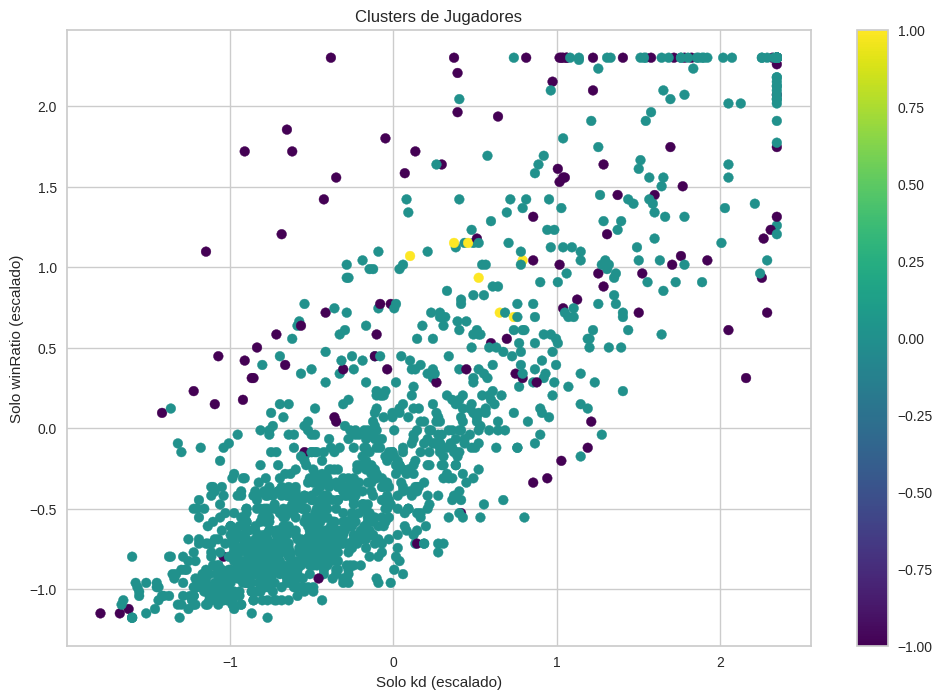

In [ ]:
# Cluster visualization
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1],
                     c=clusters, cmap='viridis')
plt.xlabel('Solo kd (escalado)')
plt.ylabel('Solo winRatio (escalado)')
plt.title('Player Clusters')
plt.colorbar(scatter)
plt.show()

Finally, we perform a detailed analysis of each cluster:

In [ ]:
# Detailed analysis of each cluster
for cluster in sorted(set(clusters)):
    if cluster == -1:
        print("\Noise points (outliers):")
    else:
        print(f"\nCluster {cluster}:")

    cluster_data = df[df['cluster'] == cluster]
    print(f"Number of players: {len(cluster_data)}")
    print("\nAverage Features: ")
    print(cluster_data[features_clustering].mean().round(2))


Puntos de ruido (outliers):
Número de jugadores: 113

Características promedio:
Solo kd               0.24
Solo winRatio         0.19
Solo matches          0.31
Solo minutesPlayed    0.29
dtype: float64

Cluster 0:
Número de jugadores: 1315

Características promedio:
Solo kd               0.17
Solo winRatio         0.09
Solo matches          0.17
Solo minutesPlayed    0.13
dtype: float64

Cluster 1:
Número de jugadores: 7

Características promedio:
Solo kd               0.23
Solo winRatio         0.18
Solo matches          0.27
Solo minutesPlayed    0.28
dtype: float64







The unsupervised clustering model served to segment players based on their behavioral patterns, achieving:

Identify clusters of players with similar behaviors, allowing for a better understanding of the causes of dropout or engagement:

Cluster 1 (Purple): committed players with good performance.
Cluster 2 (Green): Active but frustrated players, at high risk of dropping out.
Cluster 3 (Red): Casual players or dropouts.
Provide customized strategies for each cluster:

Improve the experience for Cluster 2.
Retain or recover players from Cluster 3.
Maintain the interest of Cluster 1 with appropriate incentives.
Provide insights for decision making in the design of retention and user experience improvement strategies.

The unsupervised model was useful to automatically segment the data and generate value by providing a deeper understanding of player behavior without the need for predefined labels.

# **Conclusion on Unsupervised Models for Fortnite**

Unsupervised models, such as clustering, are vital for segmenting data without predefined labels. In Fortnite, they effectively identify player behavior patterns, crucial for understanding dropout or engagement. By grouping players based on game characteristics, personalized strategies can be developed to enhance experience and retention. Clustering, in particular, segments players into groups with similar behaviors, aiding in identifying committed players, those at risk of dropping out, and casual players. This enables the design of effective retention strategies, such as targeting improvements for at-risk players (Cluster 2) or providing incentives for committed players (Cluster 1), offering a solid foundation for retention and experience enhancement.